# Prosper Loan Data Exploration
## by Donnelly Miller

There are many factors that play a role when repaying off loans. Several variables can potentially impact interests' rates, the chances of someone defaulting on a loan, and how likely the loan will be paid off in time. While there are several factors that go into determining the loan, people will take out loans for several reasons. Though building credit by establishing a payment history is often a good idea, there comes a point when it may do more harm than good. The following data exploration and data explanatory project aims to highlight some of the different interactions between certain variables when it comes to taking out loans. 

This dataset consists of information that could be used to determine the outcome of a given loan along with determining the amount of interest that will be charged with each loan. Several variables are included in this dataset in which a select number of variables will be selected from this dataset to explore which factors may have a greater influence on the outcome of a given loan. Observations and analysis between the different variables will also be performed to determine if there are any patterns that could contribute to higher interests’ rates and or repayment of a loan. 


In [1]:
# Importing all packages that will be used to clean and create various plots
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

Prior to loading in the dataset, I needed to fix the 'ListingCreationDate' column because it was only showing the hour, minute, and seconds portion. Somehow there must have either been an error during the data entry process or an error when downloading off the link provided by Udacity. Since, only the year, month, and day maybe of of any interest in this investigation, data for this column was converted into yyyy-mm-dd format. Once loaded into pandas, the date will then be converted into a datetime datatype. 

In [2]:
# Loading in the dataset as a Pandas dataframe
df = pd.read_csv("C:\\Users\\teamd\\Udacity Data Visualization\\prosper_loan_data.csv")

In [3]:
# Acquiring some general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   Unnamed: 3                           0 non-null       float64
 4   CreditGrade                          28953 non-null   object 
 5   Term                                 113937 non-null  int64  
 6   LoanStatus                           113937 non-null  object 
 7   ClosedDate                           55089 non-null   object 
 8   BorrowerAPR                          113912 non-null  float64
 9   BorrowerRate                         113937 non-null  float64
 10  LenderYield                          113937 non-null  float64
 11  EstimatedEffe

In [4]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,Unnamed: 3,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26,NaN,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27,NaN,NaN,36,Current,NaN,0.12016,0.0920,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05,NaN,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22,NaN,NaN,36,Current,NaN,0.12528,0.0974,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,NaN,36,Current,NaN,0.24614,0.2085,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


This data set consists of 113,937 rows and 82 columns. The majority (49) are of the float data type. Twelve of the columns consists of integer data types, 17 columns are in string format, and the remaining three columns are of Boolean values. 

 ## Areas of interests
With 81 columns, an analysis involving several variables could be used to determine if there are any correlations between certain variables. For this analysis, a select number of columns will be selected to do analysis on. One of the main areas of interests are factors that could influence the borrower's APR. A second area of interest may be determining the variables that may be correlated with the number of delinquencies along with the amount delinquent. A third area of interest may be determining factors that may have contributed to the outcome of a loan. For this investigation, the focus will be on loans that originated   
 

## Features of interest to help in this investigation.
Important features that will help with this investigation will include employment and salary information. An individual's credit rating along with other variables which will include delinquencies, inquiries, number of open credit lines, term of the loan, and income-to-debt ration among a few other variables. The reason for the loan could also prove useful in determining the outcome of the loan. The code cell below will give a list of the columns that will be selected from this dataset along with a brief description.
 

### The list of columns along with a brief description that will be used in this investigation.
* LoanOriginalAmount - The origination amount of the loan
* ListingCreationDate - The date the listing was created
* CreditGrade - Credit rating that was assigned the listing went live (applicable to pre-2009 listings only)
* ProsperRating (Alpha) - The Prosper Rating that was assigned at the time the listing was created (between AA - HR) applicable to loans only originated after July 2009
* Term - The length of the loan expressed in months
* LoanStatus - Current status of the loan
* BorrowerAPR - The borrower's annual percentage rate (APR) for the loan
* BorrowerRate - The borrower's interest rate for the loan
* ProsperScore - A customized risk score formulated by using historical Prosper data. The score ranges from 1 to 11 with 11 being the lowest risk score. Applicable for loans originating after July 2009.
* ListingCategory - The reason the borrower took out the loan when posting their listing
* BorrowerState - Two-letter abbreviation of the state address of the borrower at the time the listing was created
* Occupation - The occupation selected by the borrower at the time the listing was created
* EmploymentStatus - The employment status of the borrower at the time the listing was created
* EmpolymentStatusDuration - The number of months the borrower was such employment status at the time the listing was created
* IsBorrowerHomeowner - A Boolean (True or False) value, True if the borrower could prove home ownership via mortgage on their credit profile or proper documentation proving home ownership
* CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency
* CreditScoreRangeUpper - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency
* OpenCreditLines - Number of open credit lines at the time the credit profile was pulled
* CurrentDeliquencies - Number of accounts delinquent at the time the time the credit profile was pulled
* AmountDelinquent - Total amount in dollars delinquent at the time the credit profile was pulled
* IncomeRange - The income range of the borrower at the time the listing was created
* IncomeVerifiable - Borrower had indicated they had proper documentation to prove their income
* StatedMontlyIncome - The stated borrower's monthly income at the time the listing was created
* DebtToIncomeRatio - The debt to income ratio at the time the time the credit profile was pulled. The value is capped at 10.01 (any value greater than 1000% will be returned as 1001%. Null values are in place if no debt to income ratio was provided
* LoanOriginalAmount - The origination amount of the loan
* MonthlyLoanPayment - The scheduled monthly loan payment




## Data Cleaning

The amount of data cleaning during the data wrangling process will vary depending on the dataset. The focus on this project is exploratory data analysis and explanatory data analysis. The ability to be able to convey the insights to others via visualization plots provided by the data analysis process is the main goal. For this project, the amount of data cleaning will not be as extensive given the dataset. A dataframe consisting of the above-mentioned column names will be created to reduce the number of columns to have to work with. There will be some switching of a column's data type as needed.
 

In [5]:
# Creating a dataframe consisting of the 23 columns that will be used in this data investigation
loan_df = df[['LoanOriginalAmount','ListingCreationDate','CreditGrade', 'ProsperRating (Alpha)', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', \
             'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', \
             'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines', 'CurrentDelinquencies', 'AmountDelinquent', \
             'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', \
             'MonthlyLoanPayment']]

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   CreditGrade                28953 non-null   object 
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  EmploymentStatusDuration   10

In [7]:
# Making a copy of the dataframe prior to making any modifications
# This allows for comparison between the pre and post-clean version of the dataframe
df_loan = loan_df.copy()

In [8]:
# ListingCreationDate will be changed to a datetime datatype 
df_loan.ListingCreationDate = pd.to_datetime(df_loan.ListingCreationDate)

In [9]:
# Checking to see the converstion was successful
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginalAmount         113937 non-null  int64         
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   CreditGrade                28953 non-null   object        
 3   ProsperRating (Alpha)      84853 non-null   object        
 4   Term                       113937 non-null  int64         
 5   LoanStatus                 113937 non-null  object        
 6   BorrowerAPR                113912 non-null  float64       
 7   BorrowerRate               113937 non-null  float64       
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

In [10]:
# Taking out the (Alpha) portion in 'ProsperRating (Alpha)' and renaming the column to 'ProsperRating'
# Doing the same for the 'ListingCategory (numeric)' column
df_loan = df_loan.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory' })

In [11]:
# Checking to see the conversion was successful
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   LoanOriginalAmount        113937 non-null  int64         
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   object        
 3   ProsperRating             84853 non-null   object        
 4   Term                      113937 non-null  int64         
 5   LoanStatus                113937 non-null  object        
 6   BorrowerAPR               113912 non-null  float64       
 7   BorrowerRate              113937 non-null  float64       
 8   ProsperScore              84853 non-null   float64       
 9   ListingCategory           113937 non-null  int64         
 10  BorrowerState             108422 non-null  object        
 11  Occupation                110349 non-null  object        
 12  Em

In [12]:
df_loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

   The 'Term' column would be better off to be of a categorical datatype. For example, for rows where the value is 36, it would instead be 36-month. The datatype in this column will be converted from an integer value into a categorical type. Converting the data type into a categorical variable will also enable to chart the variables in an ordinal fashion.  

In [13]:
# Convert 'Term' column into a string data type
df_loan.Term = df_loan.Term.astype(str)

In [14]:
df_loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [15]:
# change 12, 36, and 60 to 12-Month, 36-Month, and 60-Month, respectively
df_loan.loc[df_loan.Term == '36', 'Term'] = '36-Month'
df_loan.loc[df_loan.Term == '60', 'Term'] = '60-Month'
df_loan.loc[df_loan.Term == '12', 'Term'] = '12-Month'

In [16]:
# Check to see that conversion was successful
df_loan.Term.value_counts()

36-Month    87778
60-Month    24545
12-Month     1614
Name: Term, dtype: int64

In [17]:
# Convert the Term column to a categorical data type
df_loan.Term = df_loan.Term.astype('category')

In [18]:
# Change the CreditGrade, ProsperRating, and IncomeRange columns to a category datatype
df_loan.CreditGrade = df_loan.CreditGrade.astype('category')
df_loan.ProsperRating = df_loan.ProsperRating.astype('category')
df_loan.IncomeRange = df_loan.IncomeRange.astype('category')
df_loan.EmploymentStatus = df_loan.EmploymentStatus.astype('category')

In [19]:
# Should now have four category type columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   LoanOriginalAmount        113937 non-null  int64         
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   category      
 3   ProsperRating             84853 non-null   category      
 4   Term                      113937 non-null  category      
 5   LoanStatus                113937 non-null  object        
 6   BorrowerAPR               113912 non-null  float64       
 7   BorrowerRate              113937 non-null  float64       
 8   ProsperScore              84853 non-null   float64       
 9   ListingCategory           113937 non-null  int64         
 10  BorrowerState             108422 non-null  object        
 11  Occupation                110349 non-null  object        
 12  Em

In [20]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [21]:
df_loan.ListingCategory.value_counts()


1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [22]:
# Numeric values do not really serve a good purpose when it comes to plotting the reasons for the loan 
# Create a new column called LoanReason that lists the actual reason for the loan
loan_reason = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', \
              5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby & Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', \
              11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', \
              16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

In [23]:
df_loan['LoanReason'] = df_loan['ListingCategory'].map(loan_reason)

In [24]:
# Inspecting to see that the column was added successfully and that the reason matches the appropriate numerical value
df_loan[['ListingCategory', 'LoanReason']].sample(15)

,ListingCategory,LoanReason
37651,3,Business
61725,3,Business
110061,1,Debt Consolidation
94567,1,Debt Consolidation
109706,1,Debt Consolidation
31909,0,Not Available
34694,4,Personal Loan
58731,7,Other
19065,0,Not Available
21503,8,Baby & Adoption


In [25]:
# Dropping the ListingCategory column
df_loan = df_loan.drop(['ListingCategory'], axis=1)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   LoanOriginalAmount        113937 non-null  int64         
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   category      
 3   ProsperRating             84853 non-null   category      
 4   Term                      113937 non-null  category      
 5   LoanStatus                113937 non-null  object        
 6   BorrowerAPR               113912 non-null  float64       
 7   BorrowerRate              113937 non-null  float64       
 8   ProsperScore              84853 non-null   float64       
 9   BorrowerState             108422 non-null  object        
 10  Occupation                110349 non-null  object        
 11  EmploymentStatus          111682 non-null  category      
 12  Em

In [26]:
df_loan.StatedMonthlyIncome.value_counts().head(8)

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
5833.333333    2319
6250.000000    2276
2500.000000    2256
Name: StatedMonthlyIncome, dtype: int64

In [27]:
# Convert StatedMonthlyIncome column to an integer data type for plotting purposes 
df_loan.StatedMonthlyIncome = round(df_loan.StatedMonthlyIncome).astype(int) # Use of round prevents from rounding towards 0

In [28]:
df_loan.StatedMonthlyIncome.value_counts().head(8)

4167    3530
5000    3391
3333    2925
3750    2430
5417    2376
5833    2324
6250    2284
2500    2262
Name: StatedMonthlyIncome, dtype: int64

In [29]:
# Converting CreditGrade and ProsperRating into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], \
                    'ProsperRating': ['HR', 'E', 'D', 'C','B', 'A', 'AA']}
                     
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)
                                                                                                  
                                                                                                  

In [30]:
df_loan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [31]:
# Save the updated and cleaner dataframe to a csv file
df_loan.to_csv('cleaned_loan_df.csv', index= False)

In [32]:
# Descriptive statistics
print(df_loan.describe())
df_loan.info()

       LoanOriginalAmount    BorrowerAPR   BorrowerRate  ProsperScore  \
count        113937.00000  113912.000000  113937.000000  84853.000000   
mean           8337.01385       0.218828       0.192764      5.950067   
std            6245.80058       0.080364       0.074818      2.376501   
min            1000.00000       0.006530       0.000000      1.000000   
25%            4000.00000       0.156290       0.134000      4.000000   
50%            6500.00000       0.209760       0.184000      6.000000   
75%           12000.00000       0.283810       0.250000      8.000000   
max           35000.00000       0.512290       0.497500     11.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min               

In order to not have the null value be treated as zeros, the null values will be filled in with the median value of the column. This will be done for the credit score columns and the debt to income ratio column. The median will be chosen over the mean due to outliers affecting the mean. 

In [33]:
loan_df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [34]:
df_loan["DebtToIncomeRatio"] = df_loan['DebtToIncomeRatio'].transform(lambda x: x.fillna(x.median()))

In [35]:
df_loan.DebtToIncomeRatio.describe()

count    113937.000000
mean          0.271746
std           0.530847
min           0.000000
25%           0.150000
50%           0.220000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [36]:
df_loan.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [37]:
df_loan['CreditScoreRangeLower'] = df_loan['CreditScoreRangeLower'].transform(lambda x: x.fillna(x.median()))

In [38]:
df_loan.CreditScoreRangeLower.describe()

count    113937.000000
mean        685.538850
std          66.286893
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [39]:
df_loan.CreditScoreRangeUpper.describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

In [40]:
df_loan['CreditScoreRangeUpper'] = df_loan['CreditScoreRangeUpper'].transform(lambda x: x.fillna(x.median()))

In [41]:
df_loan.CreditScoreRangeUpper.describe()

count    113937.000000
mean        704.538850
std          66.286893
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

## Updated Dataset Structure
There is information on 113,937 loans on this dataset. Several variables are associated with this dataset some of which include credit scores, employment status, income, number of open credit lines, occupation, and current delinquencies. There are several both numeric and categorical variables. Some of the categorical variables have been ordered. 

### Primary question to be investigated: What factors might contribute to the status of a loan?
### Secondary question to be investigated: What factors might contribute to a higher interest rate?
 

#### Variables that might be worth investigating to address the questions:
* Credit score 
* Number of open credit lines
* Current delinquencies
* Income
* Employment status
* Term length of the loan
* Interest rate
* Debt to income ratio
* Prosper score
* Original loan amount
* Required montly payment

 




Exploration addressing the primary question: What factors might contribute to the status of a loan?

## Univariate exploration
The process will begin by doing some single variable exploration.

## Loan Categories (What were the reasons for the loan?)
People take out loans for many reasons. Loans are taken out for many reasons including, debt consolidation to pay off higher interest rate credit cards, emergency medical expenses, vacation, and recreational equipment. The objective is to plot out the top reasons for the loans in the given dataset.

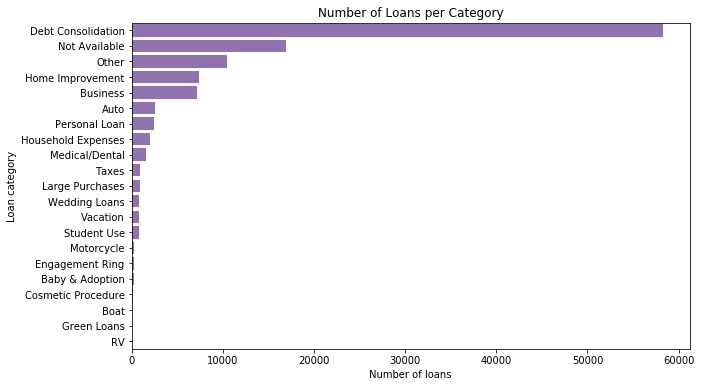

In [42]:
# Plotting the reasons for the loan beginning with the most frequent
plt.figure(figsize = (10, 6))
gen_order = df_loan['LoanReason'].value_counts().index
base_color = sn.color_palette()[4]
sn.countplot(data = df_loan, y= 'LoanReason', color = base_color, order = gen_order)
plt.xlabel('Number of loans')
plt.ylabel('Loan category')
plt.title('Number of Loans per Category');

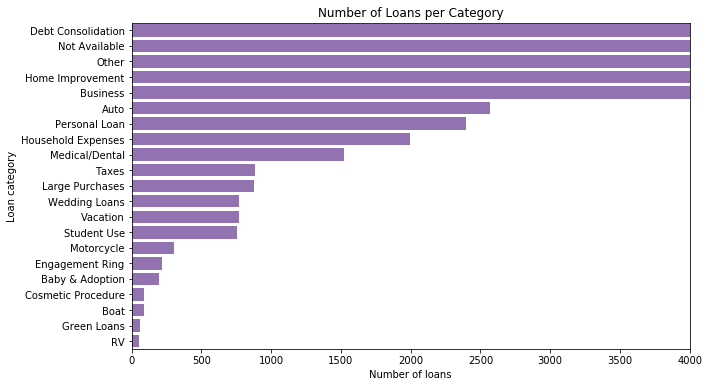

In [43]:
# Creating a horizontal bar chart of the loan status zoning in on the less frequent loan categories
plt.figure(figsize = (10, 6))
gen_order = df_loan['LoanReason'].value_counts().index
base_color = sn.color_palette()[4]
sn.countplot(data = df_loan, y= 'LoanReason', color = base_color, order = gen_order)
plt.xlabel('Number of loans')
plt.ylabel('Loan category')
plt.title('Number of Loans per Category')
plt.xlim(0, 4000);

In [44]:
# Setting up the bar graph with the relative percentage displayed next to each bar 
# Setting up the variables to be used in the bar chart
n_df = df_loan.shape[0]
type_count1 = df_loan['LoanReason'].value_counts()
type_order1 = type_count1.index

max_type_count1 = type_count1[0]
max_prop1 = max_type_count1/n_df
print(max_prop1)  

0.5117564970115064


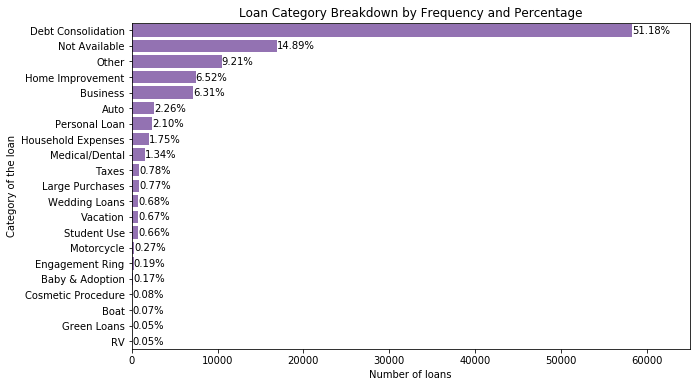

In [45]:
# Setting up a horizontal bar chart with each bar labeled with the percentage
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, y = 'LoanReason', order = type_order1, color = base_color)
 
for i in range(type_count1.shape[0]):
    count = type_count1[i]
    pct_string = '{:0.2f}%'.format(100 * count/n_df)
    plt.text(count + 1, i, pct_string, va = 'center')
    plt.xlim(0, 65000)
    plt.xlabel('Number of loans')
    plt.ylabel('Category of the loan')
    plt.title('Loan Category Breakdown by Frequency and Percentage');
 


* Over half of the loans originating are for debt consolidation. 
* Other loans that are not in the top five categories each make up a relatively small percentage of all originating loans. 
* Next up, exploration of the main variable of interest, loan status/outcome.


## Loan Status
The status of a loan can have many outcomes. Ideally, a note that is current or paid off is most preferred. One of the first steps in determining the outcome of the loan is to obtain some generic information by comparing the frequencies of the different outcomes of a given loan.     
 

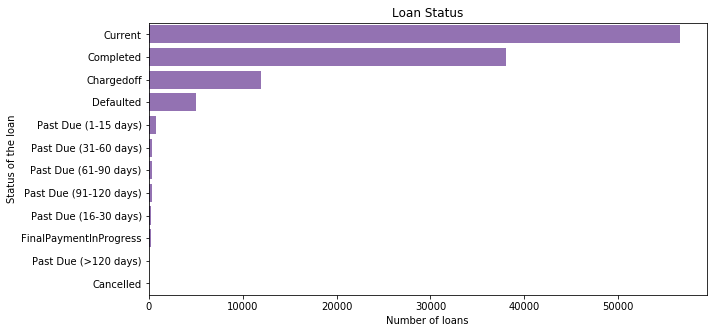

In [46]:
# Creating a horizontal bar chart of the loan status
plt.figure(figsize = (10, 5))
gen_order = df_loan['LoanStatus'].value_counts().index
base_color = sn.color_palette()[4]
sn.countplot(data = df_loan, y= 'LoanStatus', color = base_color, order = gen_order)
plt.xlabel('Number of loans')
plt.ylabel('Status of the loan')
plt.title('Loan Status');

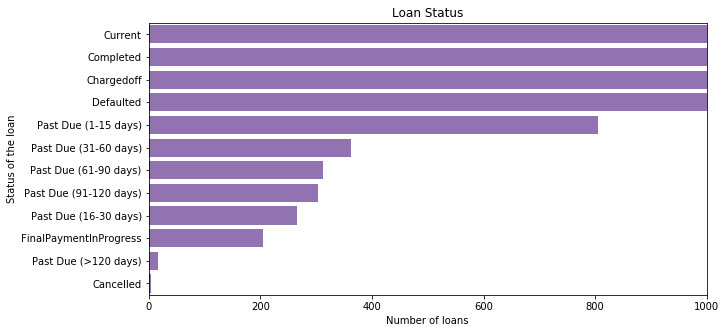

In [47]:
# Creating a horizontal bar chart of the loan status zoning in on the past-due accounts
plt.figure(figsize = (10, 5))
gen_order = df_loan['LoanStatus'].value_counts().index
base_color = sn.color_palette()[4]
sn.countplot(data = df_loan, y= 'LoanStatus', color = base_color, order = gen_order)
plt.xlabel('Number of loans')
plt.ylabel('Status of the loan')
plt.title('Loan Status')
plt.xlim(0, 1000);

In [48]:
# Setting up the bar graph with the relative percentage displayed next to each bar
# Setting up the variables to be used in the bar chart
type_counts = df_loan.LoanStatus.value_counts()
type_order = type_counts.index
max_type_count = type_counts[0]
max_prop = max_type_count/n_df
print(max_prop)
 
 

 

0.4965551137909546


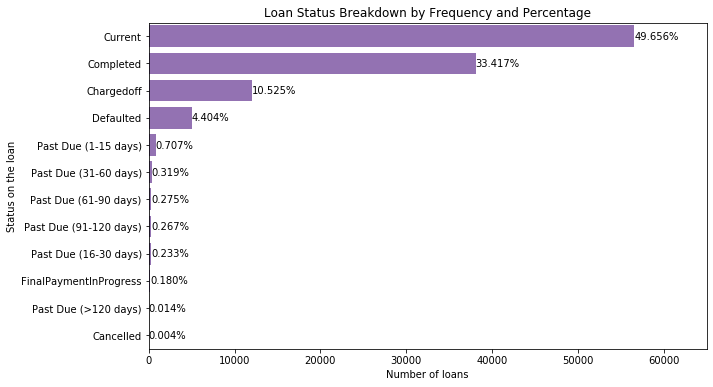

In [49]:
# Setting up a horizontal bar chart with each bar labeled with the percentage
 

plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, y = 'LoanStatus', order = type_order, color = base_color)
 
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.3f}%'.format(100 * count/n_df)
    plt.text(count + 1, i, pct_string, va = 'center')
    plt.xlim(0, 65000)
    plt.xlabel('Number of loans')
    plt.ylabel('Status on the loan')
    plt.title('Loan Status Breakdown by Frequency and Percentage');
 


When doing further analysis, it might be more efficient to combine all the 'Past Due' brackets into a single bracket.

In [50]:
# Combine the 'past due' brackets into one bracket
df_loan.LoanStatus = df_loan.LoanStatus.replace(['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', \
                                                'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], \
                                               'Past Due')

0.4965551137909546


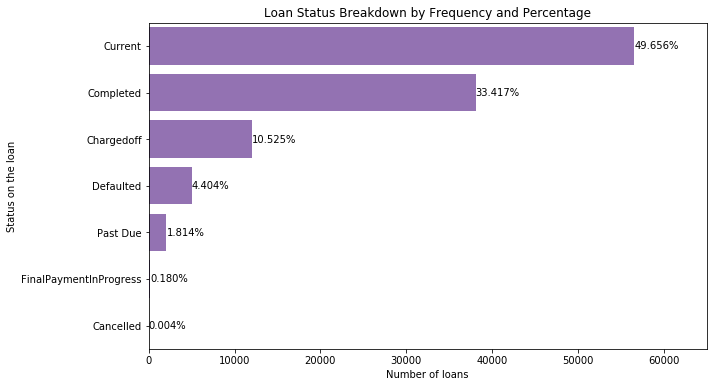

In [51]:
# Plotting the the bar graph with the updated LoanStatus column
type_counts = df_loan.LoanStatus.value_counts()
type_order = type_counts.index
max_type_count = type_counts[0]
max_prop = max_type_count/n_df
print(max_prop)

plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, y = 'LoanStatus', order = type_order, color = base_color)
 
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.3f}%'.format(100 * count/n_df)
    plt.text(count + 1, i, pct_string, va = 'center')
    plt.xlim(0, 65000)
    plt.xlabel('Number of loans')
    plt.ylabel('Status on the loan')
    plt.title('Loan Status Breakdown by Frequency and Percentage');
 

* Roughly 83% percent of the loans are either current or completed.
* There are severl loans that have been charged off or defaulted on.
* Relatively, only a small percentage of loans are past due.
* The goal is to investigate what might be some factors into loans that become charged off or defaulted on.
* Next up will be looking at the distribution of credit scores.

 ## Credit Score
A person's credit score can reflect several variables including number payments that are over 30 days late, hard inquiries, number of open accounts, length of credit history, and percentage of credit being used. A credit score is often one of many variables lenders may use to determine if an applicant is likely to stay current on a note or is at risk for defaulting on the note. One would that lenders are going to opt to lend to those with higher scores since they can be indicative of the trustworthiness of an individual paying back the loan.
 

In [52]:
# Getting some statistics on the lower range credit score
df_loan.CreditScoreRangeLower.describe()

count    113937.000000
mean        685.538850
std          66.286893
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [53]:
# Determining how many credit scores of zero there are
df_loan[df_loan['CreditScoreRangeLower'] == 0].shape[0]

133

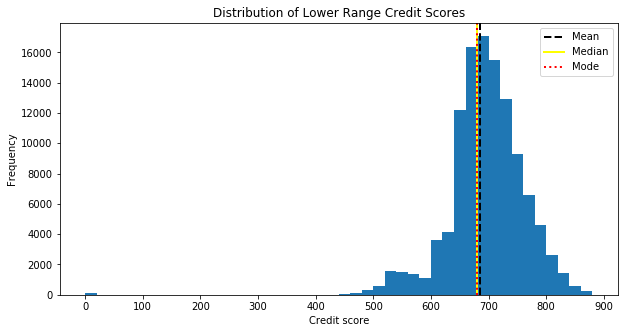

In [54]:
# Detailed histogram of the lower credit score range with measures of central tendency
mean_credit_lower_range = df_loan.CreditScoreRangeLower.mean()
median_credit_lower_range = df_loan.CreditScoreRangeLower.median()
mode_credit_lower_range = df_loan.CreditScoreRangeLower.value_counts().nlargest(1).index[0]
plt.figure(figsize = (10, 5))
bin_edges = np.arange(0, df_loan.CreditScoreRangeLower.max()+20, 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeLower', bins = bin_edges);
plt.axvline(mean_credit_lower_range, color='black', linestyle='dashed', linewidth=2)
plt.axvline(median_credit_lower_range, color = 'yellow', linewidth = 2)
plt.axvline(mode_credit_lower_range, color = 'red', linestyle = 'dotted', linewidth = 2)
plt.xlabel('Credit score')
plt.ylabel('Frequency')
plt.title('Distribution of Lower Range Credit Scores')
plt.xticks(np.arange(0, 1000, 100))
plt.legend({'Mean': mean_credit_lower_range, 'Median':median_credit_lower_range, 'Mode': mode_credit_lower_range});
 

* Most lower range credit scores appear to fall within the range of 650 to 750 with a peak around the 680 to 700 range. 

In [55]:
df_loan.CreditScoreRangeUpper.describe()

count    113937.000000
mean        704.538850
std          66.286893
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

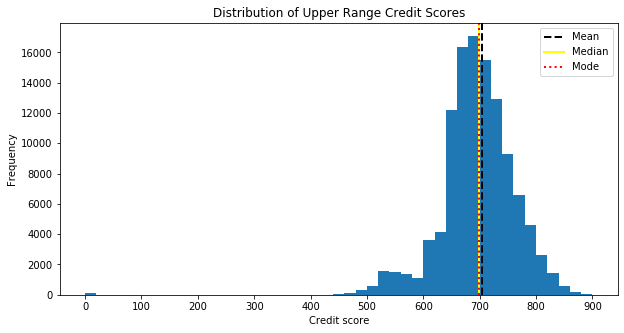

In [56]:
# Detailed histogram of the upper credit score range with measures of central tendency
mean_credit_upper_range = df_loan.CreditScoreRangeUpper.mean()
median_credit_upper_range = df_loan.CreditScoreRangeUpper.median()
mode_credit_upper_range = df_loan.CreditScoreRangeUpper.value_counts().nlargest(1).index[0]
plt.figure(figsize = (10, 5))
bin_edges = np.arange(0, df_loan.CreditScoreRangeUpper.max()+20, 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeUpper', bins = bin_edges);
plt.axvline(mean_credit_upper_range, color='black', linestyle='dashed', linewidth=2)
plt.axvline(median_credit_upper_range, color = 'yellow', linewidth = 2)
plt.axvline(mode_credit_upper_range, color = 'red', linestyle = 'dotted', linewidth = 2)
plt.xlabel('Credit score')
plt.ylabel('Frequency')
plt.title('Distribution of Upper Range Credit Scores')
plt.xticks(np.arange(0, 1000, 100))
plt.legend({'Mean': mean_credit_upper_range, 'Median':median_credit_upper_range, 'Mode': mode_credit_upper_range});
     

* The measures of central tendency (mean, median, and mode) are all slightly higher in the upper credit score range.
* Considering that Equifax, Experian, and TransUnion consider credit scores of 670 and above as good, it looks like most loans are given to people with good to exceptional credit.
* They may be some question as to the credit ranges above 850. Based what can be found on this [link](https://www.investopedia.com/articles/personal-finance/080615/highest-credit-score-it-possible-get-it.asp#:~:text=The%20best%2Dknown%20range%20of,range%20from%20250%20to%20900.) 
the  FICO (Fair Isaac Corp.) score will offer industry-specific FICO scores that range from 250 to 900. When looking at the descriptive statistics on the credit score ranges there are no values of 900 or greater.
* Next up, exploring the income ranges of those requesting loans.

## Income ranges
Like credit scores, income can often be a factor when lenders decide if or how much to approve for a loan. One would think that those who make more money have less of a need to take out loans. Exploring this categorical variable should yield some insights on to the typical income ranges of those applying for a loan through Prosper.

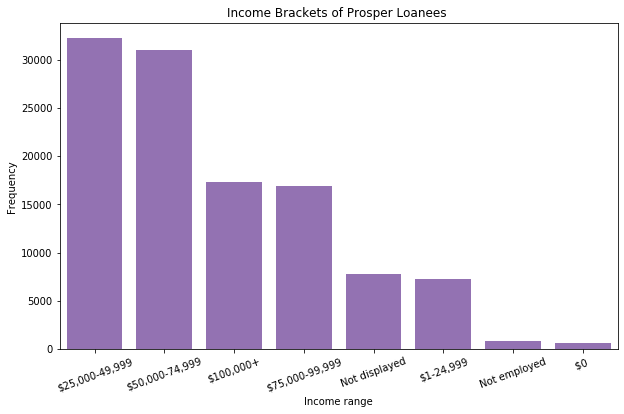

In [57]:
# Looking at the income range of those taking out loans
gen_order2 = df_loan['IncomeRange'].value_counts().index
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, x = 'IncomeRange', color = base_color, order = gen_order2)
plt.xticks(rotation = 20)
plt.ylabel('Frequency')
plt.xlabel('Income range')
plt.title('Income Brackets of Prosper Loanees ');

* Over 60,000 loans were for individuals who had annual incomes in the range of 25k to 75k. 
* The amount of loans was nearly identical for the 75k to 100k annual income group and the group making more than 100k annually.
* Loans with individuals not having income displayed or those making less than 25k annually made up a much smaller portion of 
the originating loans.
* Up next, exploring Prosper's risk assessment.
  

## Risk Assessment
Prosper ratings are used to allow potential investors to consider the loan application and the possible estimated average annual loss rate. A Prosper rating of AA presents the lowest risk, with HR posing as the greatest risk. The sequential order of risk level from least to greatest (AA, A, B, C, D, E, HR) 

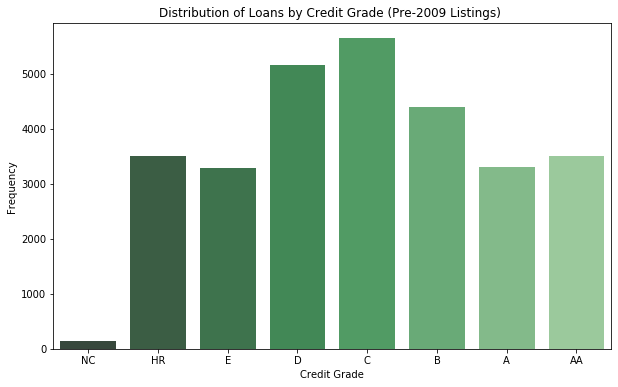

In [58]:
# Plotting the credit grade for loans originating prior to 2009
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, x = 'CreditGrade', palette = 'Greens_d')
plt.ylabel('Frequency')
plt.xlabel('Credit Grade')
plt.title('Distribution of Loans by Credit Grade (Pre-2009 Listings) ');

The above figure only considers the loans that originated prior to 2009. The plot below will consider loans that originated after July 2009. 

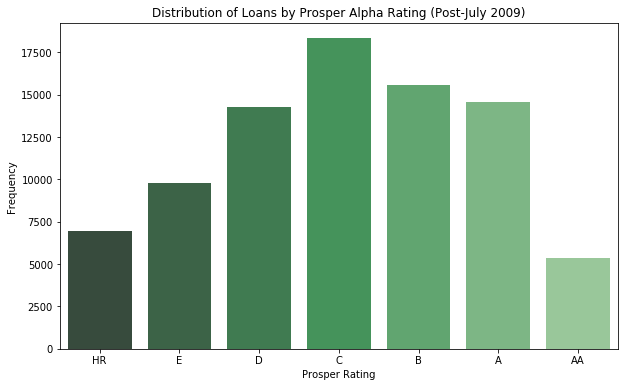

In [59]:
# Plotting the prosper rating (applicable to loans originating after July 2009)
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, x = 'ProsperRating', palette = 'Greens_d')
plt.ylabel('Frequency')
plt.xlabel('Prosper Rating')
plt.title('Distribution of Loans by Prosper Alpha Rating (Post-July 2009)');

* The lightened shade of green highlights a more optimum letter grade with A and AA with the lowest risk levels for potential investors and thus.
* A letter rating of C was most common for loans originating prior to 2009 and after July 2009. 
* When factoring in loans originating after July 2009, the frequencies of those with a rating of A and D were nearly identical. 
* A rating of AA had the least frequency when factoring for loans that originated after July 2009. Nearly 85,000 of the listings in the dataset were for loans originating after July 2009
* A variable that may be closely related is the Prosper Score, which will be explored next.  

## Prosper Score
This is a custom risk sore that uses past Prosper data to determine the level of risk a potential borrower poses along with determining any estimated loss rates. Scores range from 1 to 11 with one being the highest risk and 11 being the lowest risk.

In [60]:
df_loan.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

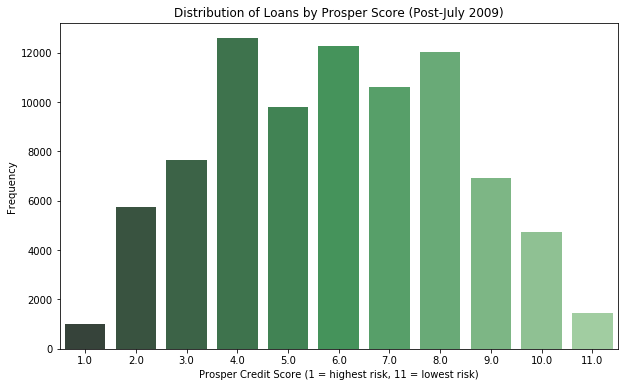

In [61]:
mean_score = df_loan.ProsperScore.mean()
median_score = df_loan.ProsperScore.median()
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, x = 'ProsperScore', palette = 'Greens_d')
plt.ylabel('Frequency')
plt.xlabel('Prosper Credit Score (1 = highest risk, 11 = lowest risk)')
plt.title('Distribution of Loans by Prosper Score (Post-July 2009)');

* Surprisingly, there many borrowers considered high risk based on this chart that still get approved for loans.
* The most frequent score is 4.0, followed by 6.0 and 8.0. 
* It looks like the number with a maximum score is not much more than those with the minimum score.
* Based on looking at the separate variables thus far, there are many factors that may help someone get approved for a loan even if some factors are more towards the negative end. 
* Maybe if a borrower's credit score is subpar and or a borrower's income level is lower, another important factor may be looking at debt to income ratio.

## Debt to Income Ratio
Many lenders and landlords will often use debt to income ratio to determine if one can qualify for a loan. This is a variable that is often used to make sure a borrower is not going over his/her budget and that the burrower's financial resources will not be strained by the additional financial obligations of the loan.

 

In [62]:
# Acquiring basic debt to income ratio statistics
df_loan.DebtToIncomeRatio.describe()

count    113937.000000
mean          0.271746
std           0.530847
min           0.000000
25%           0.150000
50%           0.220000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

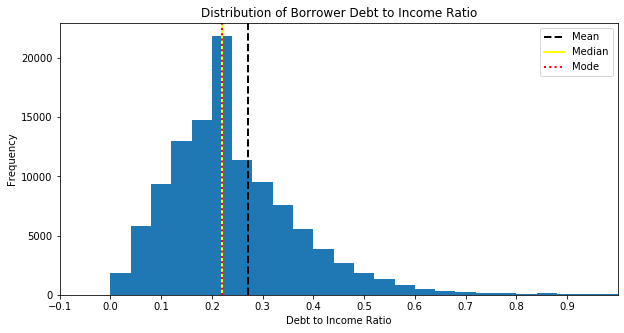

In [63]:
mean_debt_to_income_ratio = df_loan.DebtToIncomeRatio.mean()
median_debt_to_income_ratio = df_loan.DebtToIncomeRatio.median()
mode_debt_to_income_ratio = df_loan.DebtToIncomeRatio.value_counts().nlargest(1).index[0] 
plt.figure(figsize = (10, 5))
bin_edges = np.arange(df_loan.DebtToIncomeRatio.min(), df_loan.DebtToIncomeRatio.max()+ .04, .04)                
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bin_edges);
plt.axvline(mean_debt_to_income_ratio, color='black', linestyle='dashed', linewidth=2)
plt.axvline(median_debt_to_income_ratio, color = 'yellow', linewidth = 2)
plt.axvline(mode_debt_to_income_ratio, color = 'red', linestyle = 'dotted', linewidth = 2)
plt.xticks(np.arange(-.1, 1.0, .1))
plt.xlim(-.1, 1, .1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower Debt to Income Ratio')
plt.legend({'Mean': mean_debt_to_income_ratio, 'Median':median_debt_to_income_ratio, 'Mode': mode_debt_to_income_ratio});

* The distribution of borrower debt-to-income ratio is positively skewed as evident by the long right tail and the fact that the mean is greater than the media.
* Most borrowers appear to have a debt-to-income ratio that is around 20% to 24%, with 22% being the median value.
* Another numerical variable to investigate that could impact loan status outcome is the interest rate.


## Borrower Rate
The interest rate can also have an impact on how much is paid on interest on the loan. This can result in either higher monthly payments or extending the loan to reduce the monthly payment. Choosing a longer repayment plan often results in paying back much more than the original value of the loan. 

In [64]:
# Getting some statistics on the interest rate column
df_loan.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

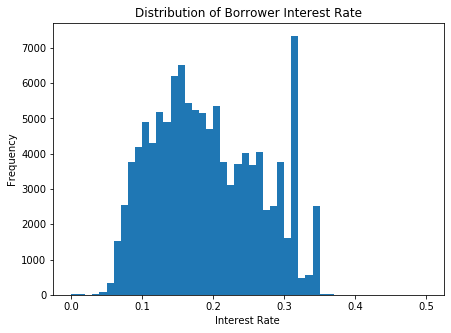

In [65]:
plt.figure(figsize = (7, 5))
bin_edges2 = np.arange(df_loan.BorrowerRate.min(), df_loan.BorrowerRate.max() +.01, .01)
sn.distplot(df_loan.BorrowerRate, bins = bin_edges2, kde = False, hist_kws = {'alpha': 1})
plt.ylabel('Frequency')
plt.xlabel('Interest Rate ')
plt.title('Distribution of Borrower Interest Rate');

* Most borrowers have an interest rate that is from around 0.08 to 0.26.
* The first peak occurs at around 0.15 with another taller, but smaller peak at around the 0.32 interest rate.
* The number of open credit lines will be investigated next.
 


## Open Credit Lines
The number of open credit lines can also impact one’s credit score and thus impact the ability to secure a low interest loan. 
A distribution of the number of open credit lines will be plotted below.
 

In [66]:
# Acquiring some general statistics on the number of open credit lines
df_loan.OpenCreditLines.describe()

count    106333.000000
mean          9.260164
std           5.022644
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          54.000000
Name: OpenCreditLines, dtype: float64

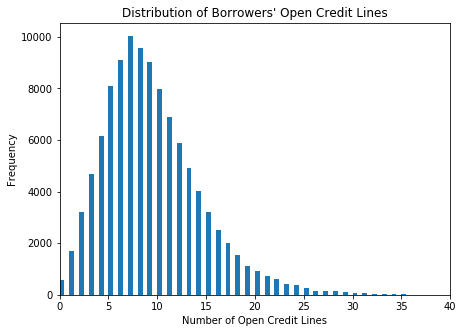

In [67]:
# Some very small changes to the mean and standard deviation
# plotting the frequencies of open credit lines
plt.figure(figsize = (7, 5))
bin_edges3 = np.arange(df_loan.OpenCreditLines.min(), df_loan.OpenCreditLines.max() +.5, .5)
sn.distplot(df_loan.OpenCreditLines, bins = bin_edges3, kde = False, hist_kws = {'alpha': 1})
plt.xlim(0, 40) # Can zone in more on the distribution without the outlier at 54
plt.ylabel('Frequency')
plt.xlabel('Number of Open Credit Lines')
plt.title("Distribution of Borrowers' Open Credit Lines"); 


* The distribution of open credit lines amount borrowers is skewed to the right.
* The number of open credit lines ranging from around five to 10 have the greatest frequencies. 
* It is intriguing to note the number of those with greater than 25 open credit lines.
* With open credit lines, there can be the risk of potential borrowers having some of those accounts in a delinquent status.
* Current delinquencies will be explored next.
 

## Current Delinquencies
Borrowers with current delinquencies can pose risks to potential lenders. Having investigated the number of open credit lines may yield minimal useful information, but factoring in a borrower's current delinquent status may yield more useful information.

In [68]:
# Acquring some statistics on current delinquencies
df_loan.CurrentDelinquencies.describe()

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

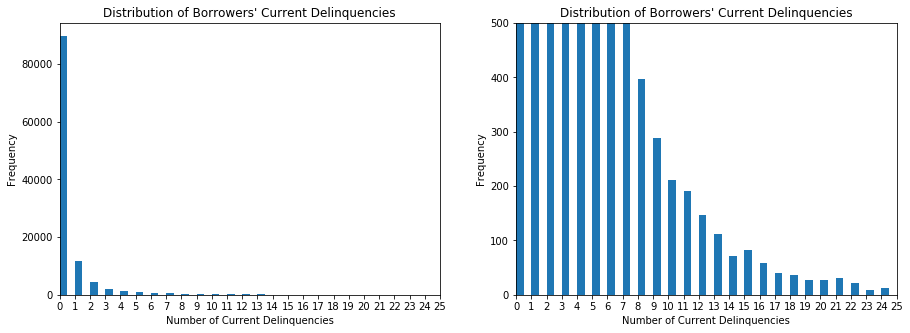

In [69]:
# We can obtain some more useful information by plotting the distribution of current delinquencies. 
# Left histogram clearly shows most borrowers have zero delinquencies.
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
bin_edges4 = np.arange(df_loan.CurrentDelinquencies.min(), df_loan.CurrentDelinquencies.max() +.5, .5)
sn.distplot(df_loan.CurrentDelinquencies, bins = bin_edges4, kde = False, hist_kws = {'alpha': 1})
plt.xlim(0, 25)  
plt.xticks(np.arange(0, 26, 1))
plt.ylabel('Frequency')
plt.xlabel('Number of Current Delinquencies')
plt.title("Distribution of Borrowers' Current Delinquencies"); 

# Right histogram shows how some borrowers still got approved despite having a large number of delinquencies
plt.subplot(1, 2, 2)
bin_edges4 = np.arange(df_loan.CurrentDelinquencies.min(), df_loan.CurrentDelinquencies.max() +.5, .5)
sn.distplot(df_loan.CurrentDelinquencies, bins = bin_edges4, kde = False, hist_kws = {'alpha': 1}) 
plt.ylim(0, 500)
plt.xlim(0, 25)
plt.xticks(np.arange(0, 26, 1))
plt.ylabel('Frequency')
plt.xlabel('Number of Current Delinquencies')
plt.title("Distribution of Borrowers' Current Delinquencies"); 

* Most borrowers approved for loans had zero delinquencies with several more thousand only have one or two delinquencies
* Surprisingly, there are some borrowers who had more than 20 delinquencies and yet still were considered in the loan application.
* Could employment have any impact on the outcome of a loan application? That will be the next variable of investigation.

## Employment Status
Part of the loan application may be asking for a borrower's current employment status. How might employment status be related to the outcome of loan. An investigation into the number of applicants fitting into a specific employment status bracket will be visualized below.

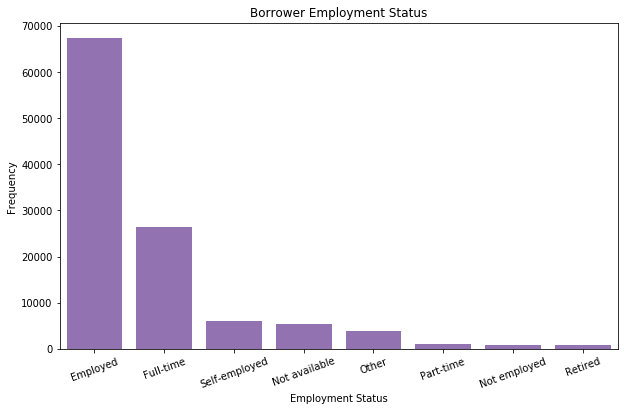

In [70]:
gen_order3 = df_loan['EmploymentStatus'].value_counts().index
plt.figure(figsize = (10, 6))
sn.countplot(data = df_loan, x = 'EmploymentStatus', color = base_color, order = gen_order3)
plt.xticks(rotation = 20)
plt.ylabel('Frequency')
plt.xlabel('Employment Status')
plt.title('Borrower Employment Status');

 
* It is not surprising to see that most borrowers would have some type of employment. However, it should also be noted that even some of those who are not employed or retired were still approved for a loan. There are factors such as amount of retirement received each month, prior credit history, and size of the loan among other factors could have played a role in the application process. 
* The last three variables to be investigated will be the term of the loan, original loan amount, and monthly payment amount information. 

## Term
The duration of the term may also have an impact on the outcome of a loan. It would not be surprising to determine if loans that require more amount of time are more likely to have negative outcomes. We will begin by investigating the percentages of borrowers for each of the given term lengths in the data.

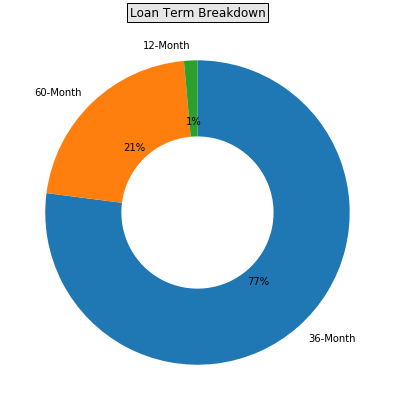

In [71]:
plt.figure(figsize = (7,7))
sorted_counts = df_loan.Term.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock= False, autopct='%.1d%%', \
       wedgeprops = {'width' : 0.5})
plt.title('Loan Term Breakdown', bbox={'facecolor':'.9', 'pad':3});

* It may be surprising to see that the smallest percentage goes to 12-month loan terms.
* Extending the loan, often results in smaller monthly payments which is why the largest percentage is for 36-month term loans. The duration is not too long, while at the same might provide relief from having to pay an exceptionally large monthly payment.
* The original loan amounts will be investigated next.
 

## Originated Loan Amount
How much the originating loan amount coupled with other factors can also have implications on not only the interest rate but the potential outcome of the loan obligation. A distribution of the original loan amounts will be plotted.

In [72]:
# Statistics on the original loan amounts
print(df_loan.LoanOriginalAmount.value_counts().head(10))
df_loan.LoanOriginalAmount.describe() 

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
Name: LoanOriginalAmount, dtype: int64


count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

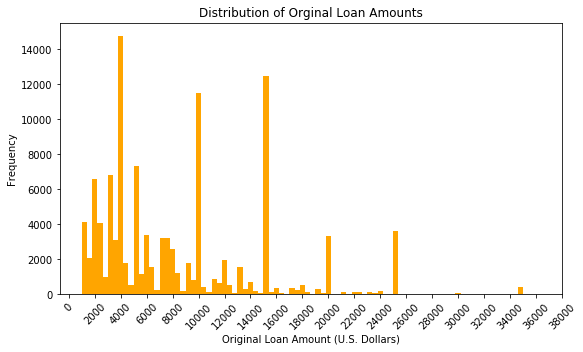

In [73]:
plt.figure(figsize = (9, 5))
binsize = 400
bin_edges5 = np.arange(df_loan.LoanOriginalAmount.min(), df_loan.LoanOriginalAmount.max() + binsize, binsize)
sn.distplot(df_loan.LoanOriginalAmount, bins = bin_edges5, kde = False, color = 'orange', hist_kws = ({'alpha': 1}))
plt.ylabel('Frequency')
plt.xlabel('Original Loan Amount (U.S. Dollars)')
plt.xticks(np.arange(0, 40000, 2000), rotation = 45)
plt.title('Distribution of Orginal Loan Amounts');


* The distribution of loans shows that most of the original loan amounts fall within 1,000 to 10,000 dollars.
* There are three distinct peaks at 4,000, 10,000, and 15,000 dollars.
* The frequency of original loan amounts is much lesser after 15,000 dollars with a couple of shorter peaks at the 20,000- and 25,000-dollar mark.
* Finally, we will look at the distribution of the scheduled monthly payments.

 


## Scheduled Monthly Payment
Another numeric variable to consider is a borrower's monthly payment for a loan. Once again, a plot will be used to show the distribution for this variable. 

In [74]:
# Statistics on the monthly payment amount
print(df_loan.MonthlyLoanPayment.value_counts().head(10))
df_loan.MonthlyLoanPayment.describe()

173.71    2423
0.00       935
172.76     536
86.85      472
174.20     460
130.28     370
163.28     286
326.62     280
166.54     277
136.98     277
Name: MonthlyLoanPayment, dtype: int64


count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

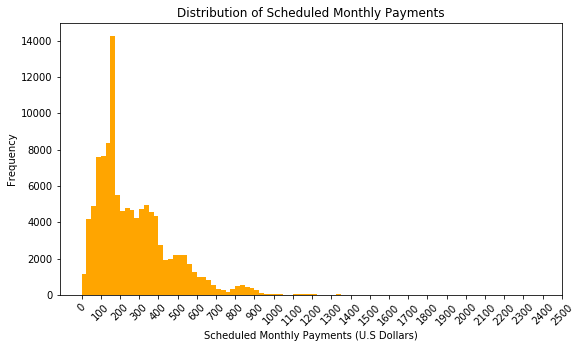

In [75]:
# Plotting the monthly payment distribution
plt.figure(figsize = (9, 5))
binsize2 = 25
bin_edges6 = np.arange(df_loan.MonthlyLoanPayment.min(), df_loan.MonthlyLoanPayment.max() + binsize2, binsize2)
sn.distplot(df_loan.MonthlyLoanPayment, bins = bin_edges6, kde = False, color = 'orange', hist_kws = {'alpha': 1})
plt.xticks(np.arange(0, 2501, 100), rotation = 45)
plt.ylabel('Frequency')
plt.xlabel('Scheduled Monthly Payments (U.S Dollars)')
plt.title('Distribution of Scheduled Monthly Payments');

* The long tail to the right is evidence that the distribution of scheduled monthly payments is skewed to the right. 
* There is a peak at around 170 to 180 dollars.
* Most monthly payments appear to be less than 500 dollars a month.
* It is intriguing as to why there are almost a thousand cases of their being a zero-dollar monthly payment.
 

 ## Univariate Exploration Discussion

### Exploration Summary
* Debt consolidation made up most reasons for the origination of a loan.
* Current and completed obligations made up roughly 83% of the loan outcomes.
* Defaulted, charged off, and late accounts still made up a large number of outcomes.
* Both lower and upper credit scores showed a mostly normal distribution with many credit scores around the 650 to 750 mark. Credit scores at 670 or above a generally considered good scores. There may be slight categorical variations in how credit scores are ranked. For the most part it can be assumed that most applicants have good or better credit scores.
* Lower middle-class and middle-class were most represented in this data set. This classification can be dependent on the number within the household. A single person making 50k and only having to support oneself is different than having 50k to support several people. Income ranges below 75k were most represented in the dataset. Income ranges from 75k on up to 100k were the second most represented in the dataset. Over 5,000 were in documented as making under 25k.
* A letter rating of C was most common for loans originating prior to 2009 and after July 2009.
* When factoring in loans originating after July 2009, the frequencies of those with a rating of A and D were nearly identical.
* Individuals with Prosper scores indicating high risk still got approved for loans. Scores of 4, 6, and 8 were the scores most represented in the data.
* Debt to income ratio was positively skewed with most borrowers demonstrating to have a debt-to-income ratio that is around 20% to 24%, with 22% being the median value.
* Borrowers had a huge range of interests’ rates with ranges of 8% to 26% being most common. There were two peaks one occurring at around 15% and at around 32%.
* The number of open credit lines was also positively skewed with a peak at around 7 to 8 open credit lines. There were still thousands of borrowers that had 15 or more open credit lines.
* Most borrowers had zero delinquencies on file. Several more thousand borrowers had one or two delinquencies on file.
* Most borrowers had some form of employment with full-time employment being the most frequent out of the specified employment status types.
* Loan terms of 36 months made up the greatest percentage of originating loans, while 12-month terms made up the fewest.
* The distribution of loans shows that most of the original loan amounts fall within 1,000 to 10,000 dollars.
* There are three distinct peaks at 4,000, 10,000, and 15,000 dollars.
* The frequency of original loan amounts is much lesser after 15,000 dollars with a couple of shorter peaks at the 20,000- and 25,000-dollar mark.
* Scheduled monthly loan payments were also positively skewed with a peak at around 170-180 dollars as scheduled monthly payments. Most scheduled monthly payments were below 500 dollars.

### Unusual observations
* There were credit scores that were above 850. A credit score typically has a maximum value of 850. FICO (Fair Isaac Corp.) score will offer industry-specific FICO scores that range from 250 to 900. This could be a possible explanation for those higher credit scores.
* Non-displayed incomes, zero income values, and not employed somehow had loans that were originated for such borrowers.
* Those with the highest risk based on Prosper scores also had loans originated for such borrowers.
* Debt-to-income ratios of greater than 0.5 were also observed with a maximum of 10.01 or 1001%. That seems way off.
* Observations of borrowers having 30 or more credit lines with a maximum of 54 noted.
* Loans origination for borrowers with more than 20 delinquencies with a maximum of 83!
* Loans originating for borrowers who are not employed or retired. However, a healthy retirement amount may also signify financial security to pay off a loan. The bigger surprise is for loans originating for those who claim to have no job.
 
### Data wrangling
* Credit grade, Prosper rating, term, income ranges, and employment status were switched to categorical data types. Since there were a limited number of classifications or each of these variables, I decided it might be better to have these as categorical instead of objects (strings). This is not something that would be done for a column with several unique variables like that of the borrower state column.
* Debt-to-income and credit score values with null values were filled in with the median value of the column. I chose this over the mean due to outliers that can influence the mean. I filled in these values since values of zero could also skew the results.
* There were some conversions of data types in some of the other columns of the dataset, but these will not be mentioned since those columns will not be used for this investigation.


In [76]:
# Printing out the info to avoid excessive scrolling
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   LoanOriginalAmount        113937 non-null  int64         
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   category      
 3   ProsperRating             84853 non-null   category      
 4   Term                      113937 non-null  category      
 5   LoanStatus                113937 non-null  object        
 6   BorrowerAPR               113912 non-null  float64       
 7   BorrowerRate              113937 non-null  float64       
 8   ProsperScore              84853 non-null   float64       
 9   BorrowerState             108422 non-null  object        
 10  Occupation                110349 non-null  object        
 11  EmploymentStatus          111682 non-null  category      
 12  Em

## Bivariate Exploration

To get a better idea of the data and see if there are any interesting correlations between the when doing bivariate analysis, a series of boxplots doing some pairwise correlations will be printed out. Using the PairGrid function can help to see where there may be some correlations and where to start focusing the data exploration. Although the main questions for this project have been investigated and the key insights have been conveyed, the below PairGrid plots demonstrate how the use of functions can help reduce repetitive code. 

In [77]:
# Creating a list of select numerical variables I want to look at
num_vars_sel = ['ProsperScore', 'MonthlyLoanPayment', 'BorrowerRate']
# Creating a list of select categorical variables
cat_vars_sel = ['Term', 'EmploymentStatus', 'IncomeRange']

<Figure size 360x360 with 0 Axes>

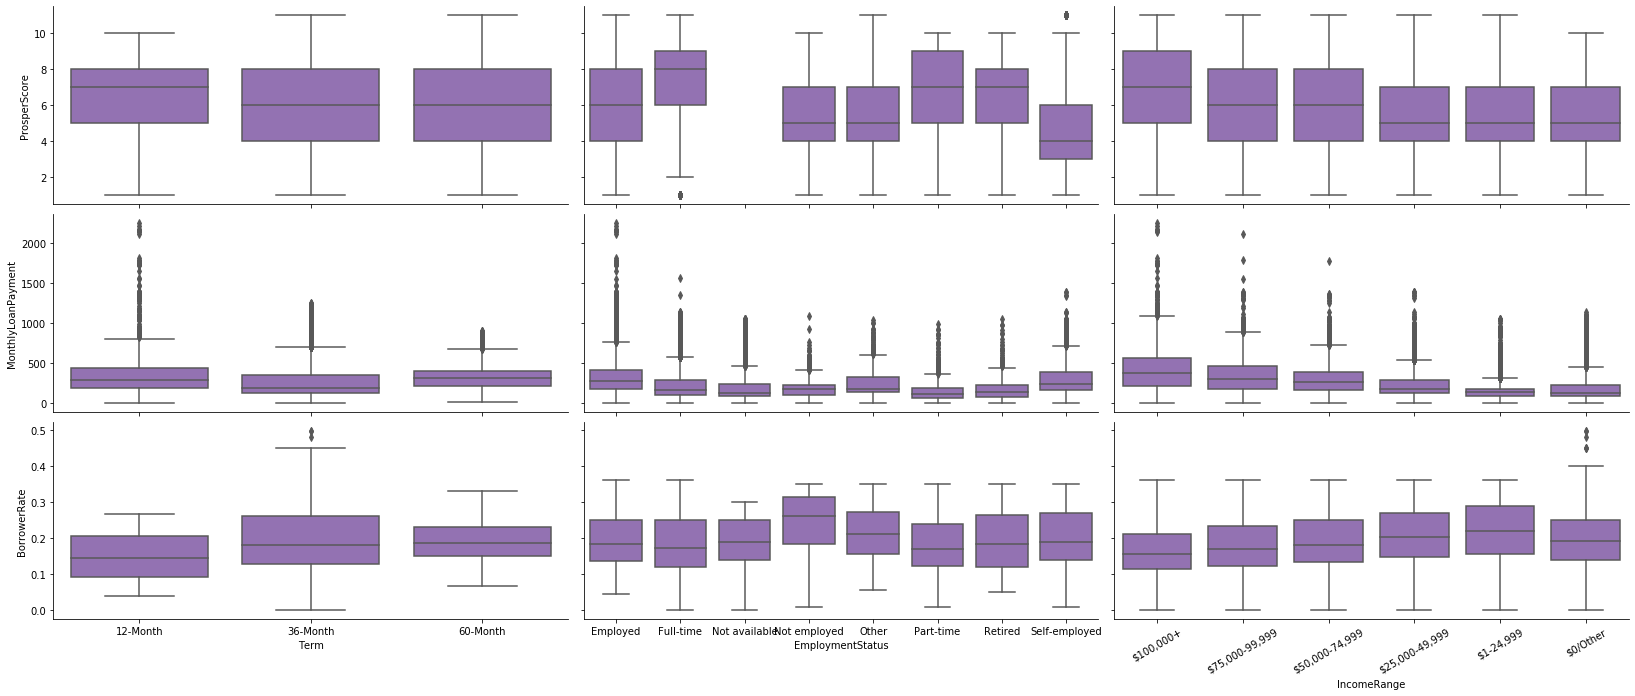

In [135]:
def boxgrid(x, y, **kwargs):
    """ This function provides a quick way to plot boxplots using Seaborn's PairGrid function.
    The color has been set to a purple shade by using the integer 4"""
    default_color = sn.color_palette()[4]
    sn.boxplot(x, y, color = default_color) 
# Functions usually have a print or return statement, the actual plot appears to take place place of a print statement
plt.figure(figsize = (5, 5))
g = sn.PairGrid(data = df_loan, y_vars = num_vars_sel, 
                x_vars = cat_vars_sel, height = 3, aspect = 2.5)
g.map(boxgrid);
plt.xticks(rotation=30);
 

<Figure size 360x360 with 0 Axes>

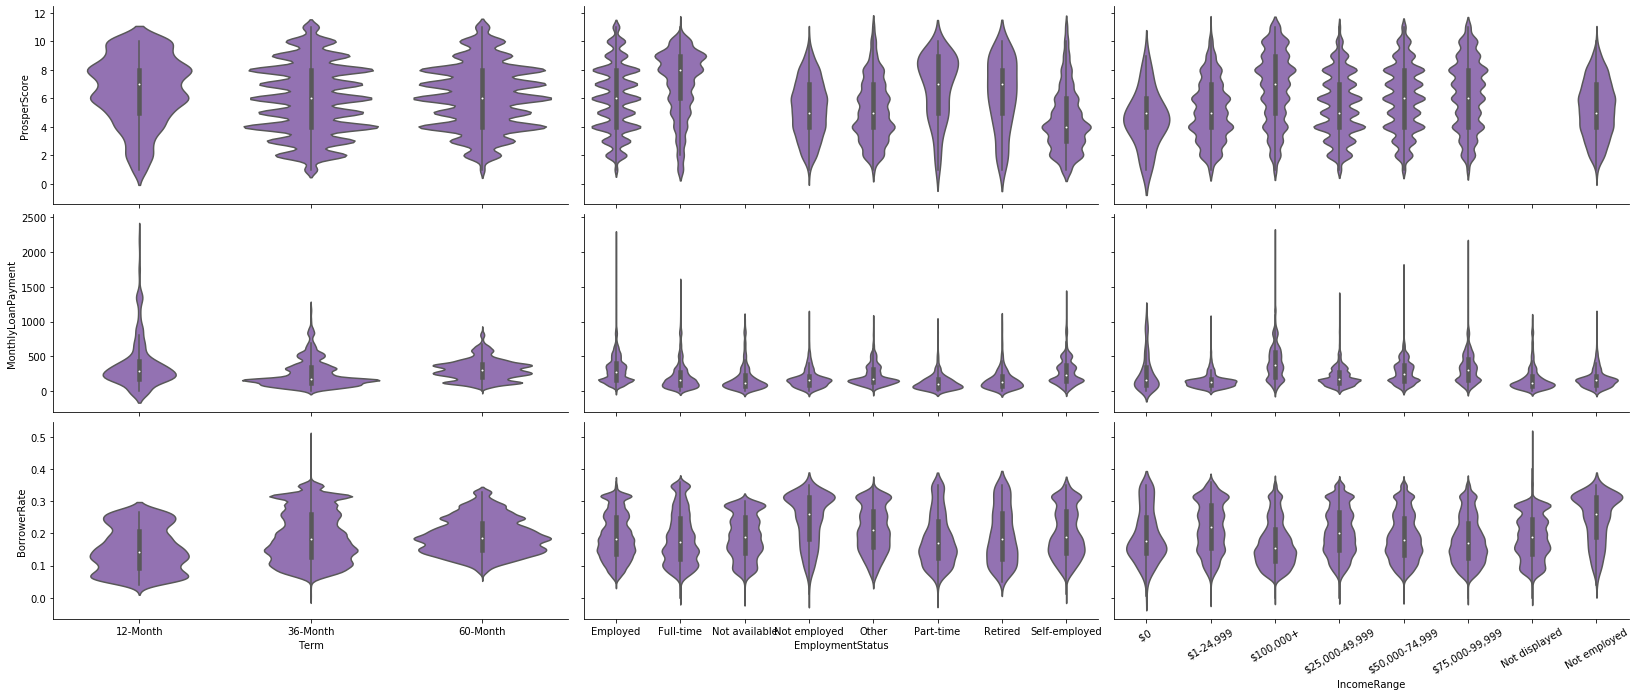

In [79]:
# The same technique can be used to create a PairGrid of violin plots, simply by changing boxplot to violinplot.
def violingrid(x, y, **kwargs):
    """ This function provides a quick way to plot violin plots using Seaborn's PairGrid function.
    The color has been set to a purple shade by using the integer 4"""
    default_color = sn.color_palette()[4]
    sn.violinplot(x, y, color = default_color)

plt.figure(figsize = (5, 5))
g = sn.PairGrid(data = df_loan, y_vars = num_vars_sel, 
                x_vars = cat_vars_sel, height = 3, aspect = 2.5)
g.map(violingrid);
plt.xticks(rotation=30);

When comparing the two different plot types, boxplots seem to clearer picture on where to start focusing our data exploration. When looking at income levels, is an upward trend in interest rate levels in as income decreases. Both the violin plot and box plot show that 36-month term loans have the widest distribution of interests' rates. Prosper scores trend downward as income decreases. These insights point in the direction of where we may want to focus our exploration. The main point addressed by including these additional plots is the increased efficiency in using functions to help speed up workflow. 

#### 1. Observing relationships between two numerical variables

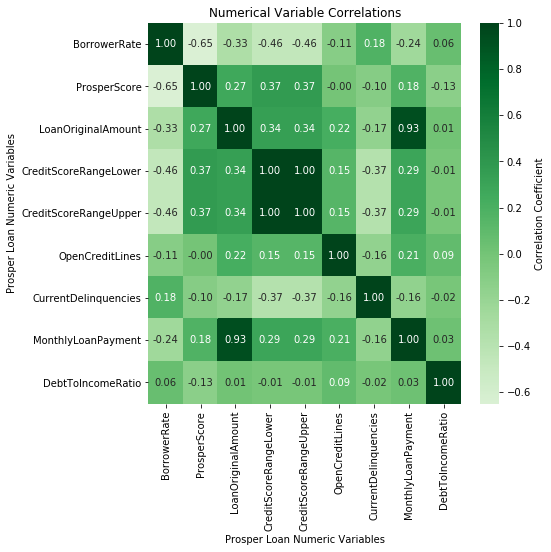

In [138]:
# Using a heatmap to plot the correlations with annotations
# Begin by creating a list of the numerical variables to be compared with one another
num_vars = ['BorrowerRate', 'ProsperScore', 'LoanOriginalAmount', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', \
           'OpenCreditLines', 'CurrentDelinquencies', 'MonthlyLoanPayment', 'DebtToIncomeRatio']
plt.figure(figsize = (7, 7))
sn.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'Greens', center = 0, \
           cbar_kws = {'label': 'Correlation Coefficient'}) 
plt.xlabel('Prosper Loan Numeric Variables')
plt.ylabel('Prosper Loan Numeric Variables')
plt.title('Numerical Variable Correlations');
           

According to the following [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/) There is a strong positive correlation between the monthly loan payment and the original loan amount. There are no other strong correlations observed. There are some moderate or fair negative correlations between Prosper score and the interest rate & credit scores and interest rates. There is also a moderate or fair negative correlation between credit scores and current delinquencies, although such correlation does approach the weak end of the spectrum. There is also a moderate positive correlation between the Prosper score and credit scores. All other variables have weak to almost no correlations. 

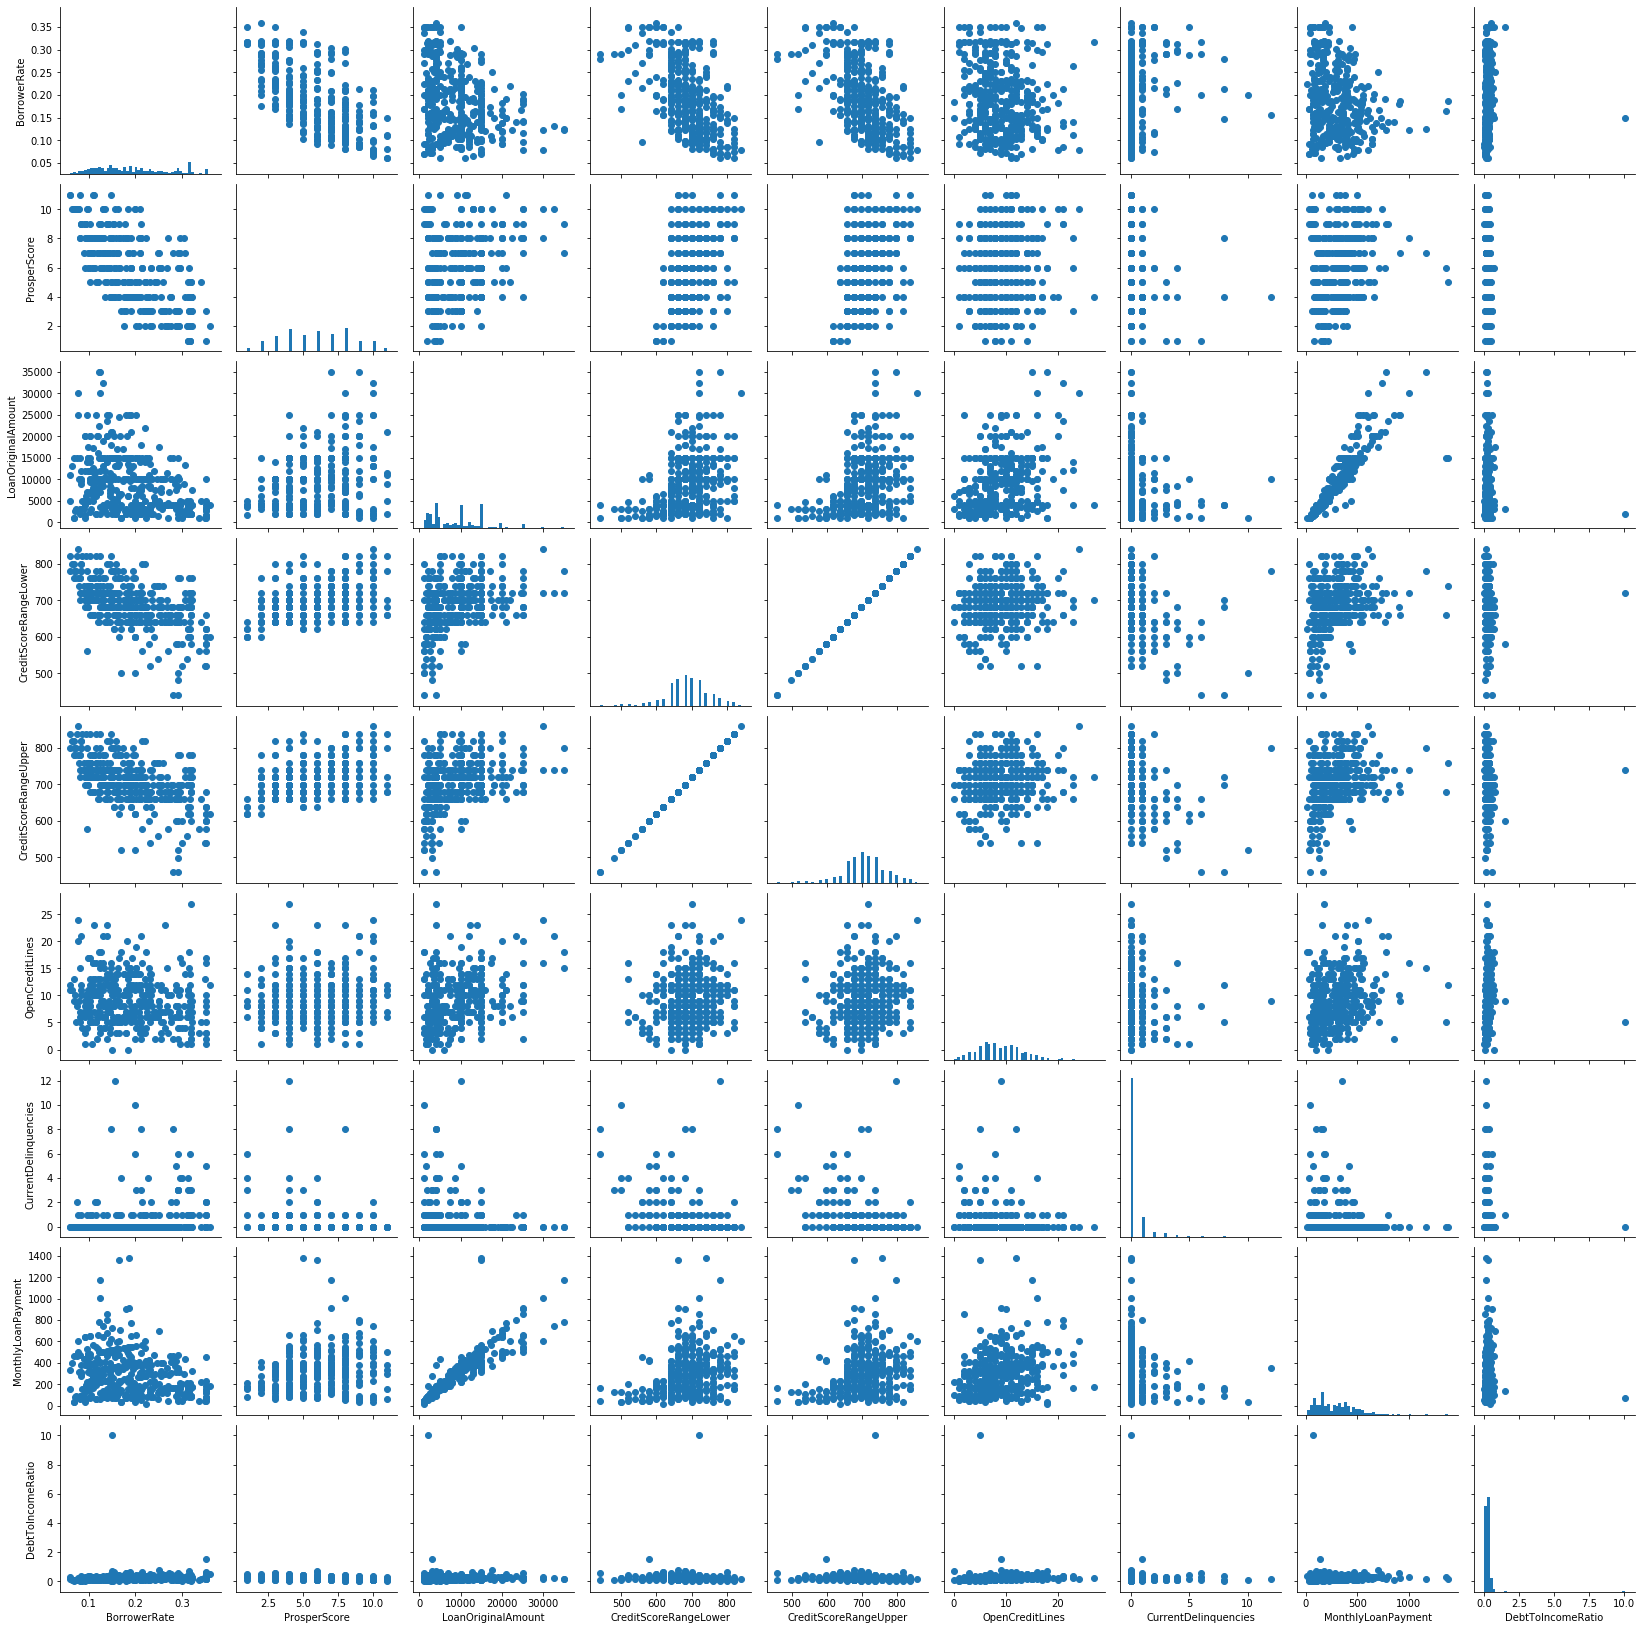

In [81]:
# Plotting a matrix of pairwise correlations by using a sample of 400 loans
# Use of a smaller sample size from the dataset reduces excessive overlap of data points 
sample1 = np.random.choice(df_loan.shape[0], 400, replace = False)
loans_sample = df_loan.loc[sample1,:]
g = sn.PairGrid(data = loans_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter);

* Like the heatmap, the strong positive correlation between the original loan amount and monthly payment is observed.
* The moderate, negative correlation between interest rate and prosper score can also be observed.
* The other negative correlation that may not be as easily observable given this pairwise plot is relationship between credit scores and interests' rates. 
* The relationships between Prosper score and interest rate along with the correlation between credit scores and interest rate with be investigated further. The upper credit score will be used in the further investigation.
 

The following scatterplot and heatmap will used to show the relationship between the upper range credit scores and interests' rates.

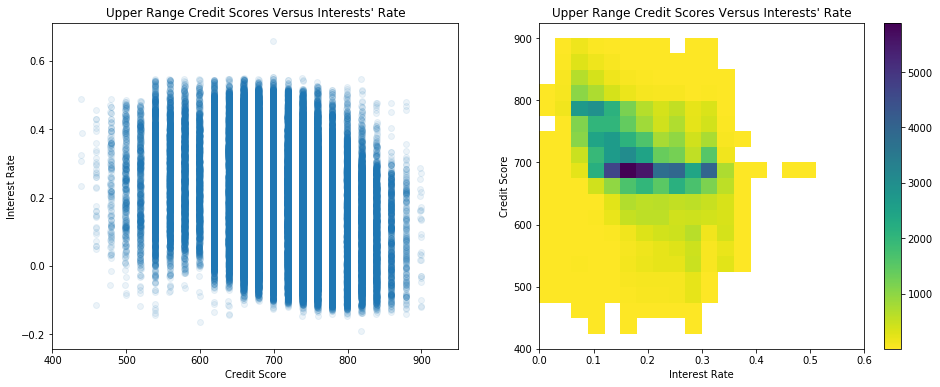

In [82]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
sn.regplot(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.5, y_jitter = 0.2, \
          scatter_kws = {'alpha':1/12}) # Alpha setting reduced to a small fraction due to numerous overlapping data points
plt.xlim(400, 950)
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.title( "Upper Range Credit Scores Versus Interests' Rate");

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan.BorrowerRate.max() + 0.5, 0.03)
bins_y = np.arange(400, df_loan.CreditScoreRangeUpper.max() + 50, 25)
plt.hist2d(data = df_loan, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], cmap = 'viridis_r', \
           cmin = 0.5);
plt.xlim(0, 0.6)
plt.ylabel('Credit Score')
plt.xlabel('Interest Rate')
plt.title("Upper Range Credit Scores Versus Interests' Rate")
plt.colorbar();

 

 Both the scatterplot and the heatmap will show that there is some correlation between credit scores and the interest rate. This relationship may be more visible in the heatmap as you can see in the darker regions that as credit scores go up, there is the tendency for the interest rate to be lower. Typically, those with good credit will often get lower interests' rates.   

The same plotting technique above will be applied to further investigate the relationship between the Prosper Score and interests' rates. 

In [83]:
df_loan.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

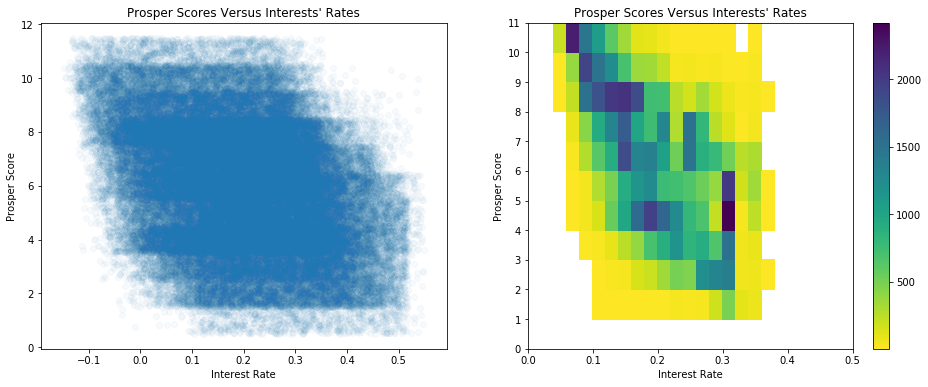

In [84]:
# Due to the large amounts of data points, will set x and y-jitter values for the scatterplot
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
sn.regplot(data = df_loan, x = 'BorrowerRate', y = 'ProsperScore', fit_reg = False, x_jitter = 0.2, \
           y_jitter = 0.5, scatter_kws = {'alpha':0.03})   
plt.xlabel('Interest Rate')
plt.ylabel('Prosper Score')
plt.title( "Prosper Scores Versus Interests' Rates");

plt.subplot(1, 2, 2)
bins_x2 = np.arange(0, df_loan.BorrowerRate.max() + 0.5, .02)
bins_y2 = np.arange(0, df_loan.ProsperScore.max() +1, 1)
plt.hist2d(data = df_loan, x = 'BorrowerRate', y = 'ProsperScore', bins = [bins_x2, bins_y2], cmap = 'viridis_r', \
           cmin = 0.5);
plt.yticks(np.arange(0, 12, 1))
plt.xlim(0, 0.5)
plt.xlabel('Interest Rate')
plt.ylabel('Prosper Score')
plt.title("Prosper Scores Versus Interests' Rates")
plt.colorbar();


* Once again, the heatmap seems to show the correlation more clearly than the scatterplot. 
* Two specific points of interest are the two noticeably darkened spots, one at the upper left and corner, and the other one lining up on the Prosper score of around 4 to 5 and at around the interest rate of 0.3. The darkened spots can indicate that having a good score may in fact result in lower interests' rates.
 

#### 2. Observing relationships between one quantitative variable and one qualitative variable

#### A. Violin and boxplots for the status of loans and upper range credit ratings.


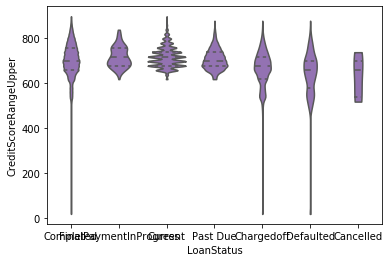

In [139]:
# To help reduce some repetitive code, a function will be created for both violin plots and boxplots. 
# Creating and testing out the function
def violinplot(x, y, **kwargs):
    """ This function provides a quick way to plot violinplots using Seaborn's violin plot function.
    The color has been set to a purple shade by using the integer 4
    and inner has been set to quartile
    the cut method avoids having the plot appearing to show distributions values below 0"""
    base_color = sn.color_palette()[4]
    sn.violinplot(x, y, color = base_color, inner = 'quartile', cut = 0)
violinplot(df_loan.LoanStatus, df_loan.CreditScoreRangeUpper)    

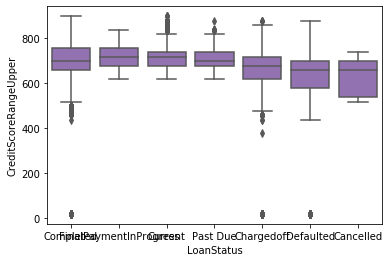

In [116]:
# Function for boxplots and testing out the function
def box_plot(x, y, **kwargs): # Adding underscore to not get confused with 'boxplot'
    """ This function provides a quick way to plot boxplots using Seaborn's boxplot function.
    The color has been set to a purple shade by using the integer 4
    """
    base_color = sn.color_palette()[4]
    sn.boxplot(x, y, color = base_color)
box_plot(df_loan.LoanStatus, df_loan.CreditScoreRangeUpper)

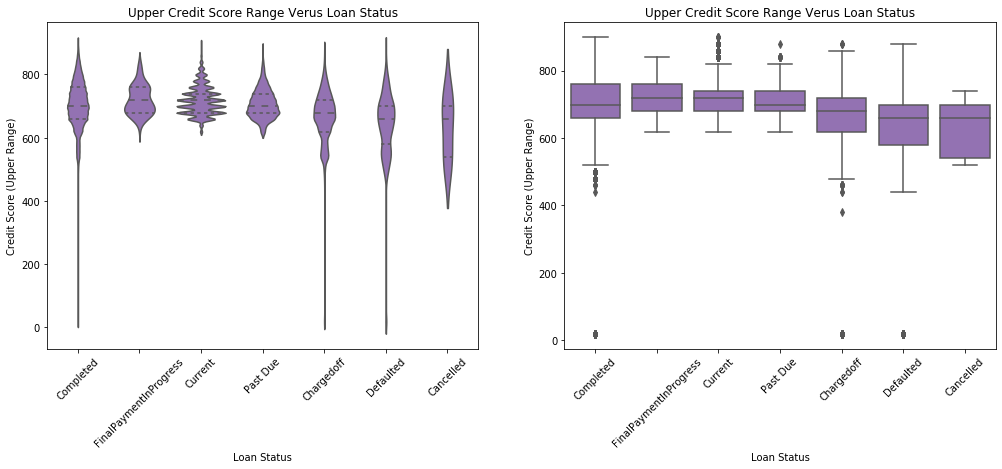

In [118]:
plt.figure(figsize = (17, 6))
plt.subplot(1, 2, 1)
violinplot(df_loan.LoanStatus, df_loan.CreditScoreRangeUpper)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Credit Score (Upper Range)')
plt.title('Upper Credit Score Range Verus Loan Status');

plt.subplot(1, 2, 2)
box_plot(df_loan.LoanStatus, df_loan.CreditScoreRangeUpper)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Credit Score (Upper Range)')
plt.title('Upper Credit Score Range Verus Loan Status');

* Two intriguing observations to note on the violin plot. The first one being that the distribution of credit scores for the loans with a current status appears to have several peaks indicating that the distribution is multimodal. The second observation is a bimodal distribution of credit scores for the loans in which the final payment is in progress.
* The boxplot reveals the median values along with the interquartile range (IQR) are lower for loans that have resulted in being defaulted, charged off, or cancelled. This may suggest that credit scores be a good indicator the borrower's ability to pay off a loan.


#### B. Violin and boxplots for the status of loans and number of delinquencies

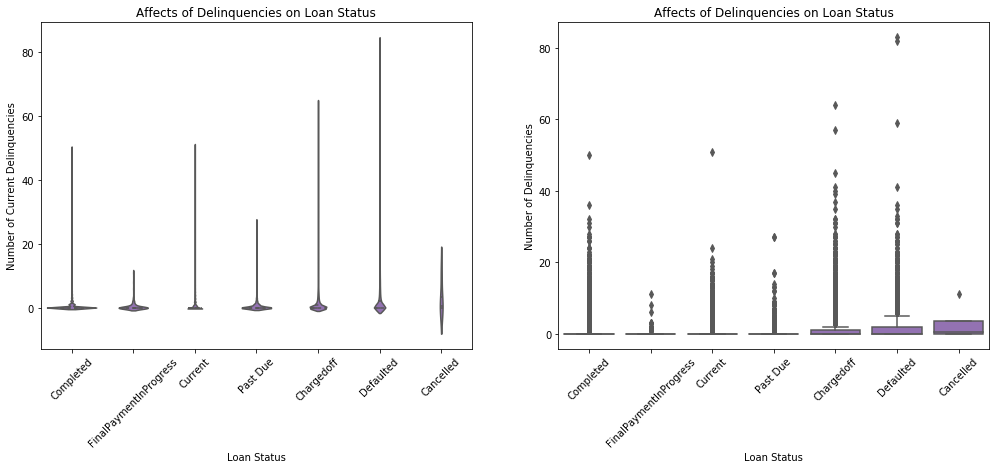

In [120]:
plt.figure(figsize = (17, 6))
plt.subplot(1, 2, 1)
violinplot(df_loan.LoanStatus, df_loan.CurrentDelinquencies)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Number of Current Delinquencies')
plt.title('Affects of Delinquencies on Loan Status');

plt.subplot(1, 2, 2)
box_plot(df_loan.LoanStatus, df_loan.CurrentDelinquencies)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Number of Delinquencies')
plt.title('Affects of Delinquencies on Loan Status');

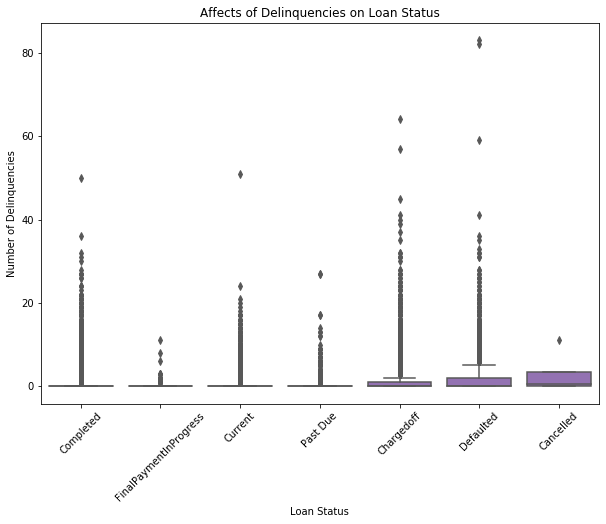

In [121]:
# Replotting the boxplot as we do not seem to get much useful information from the violin plot
plt.figure(figsize = (10, 7))
box_plot(df_loan.LoanStatus, df_loan.CurrentDelinquencies)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Number of Delinquencies')
plt.title('Affects of Delinquencies on Loan Status');

* The boxpot reveals that defaulted along with charged off accounts have a wider IQR along with higher maximum values compared to loans that are current or completed.
* The loans with these two negative outcomes also have more outliers leaning towards a higher number of delinquencies.
* The current delinquencies a borrower faces may also have some impact on the ability to pay off a loan.


#### C. Violin and boxplots for the status of loans and debt-to-income ratio

A new dataframe consisting of only rows with a debt-income-ratio of 0.50 or less be created to plot the following two charts. This will help clean up some of the outliers to enable a more detailed investigation as to how debt-to-ratio may affect the outcome of a loan.

In [89]:
# Selecting only the rows where the debt-to-income ratio is <= 0.50
df_loan2 = df_loan[df_loan['DebtToIncomeRatio'] <= 0.50]

In [90]:
df_loan2.DebtToIncomeRatio.describe()

count    108673.000000
mean          0.222621
std           0.105051
min           0.000000
25%           0.150000
50%           0.220000
75%           0.290000
max           0.500000
Name: DebtToIncomeRatio, dtype: float64

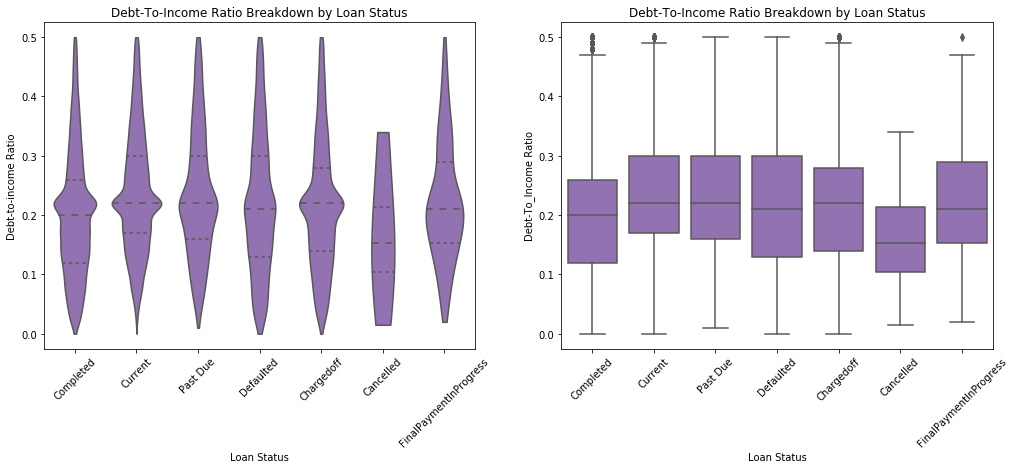

In [140]:
plt.figure(figsize = (17, 6))
plt.subplot(1, 2, 1)
violinplot(df_loan2.LoanStatus, df_loan2.DebtToIncomeRatio)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-income Ratio')
plt.title('Debt-To-Income Ratio Breakdown by Loan Status');

plt.subplot(1, 2, 2)
box_plot(df_loan2.LoanStatus, df_loan2.DebtToIncomeRatio)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Debt-To_Income Ratio')
plt.title('Debt-To-Income Ratio Breakdown by Loan Status');

* Aside from the mostly unimodal distributions depicted in the violin plot, the debt-to-income ratio does not appear to have much of an impact on a borrower's ability to pay back a loan.
* It may be noted that there are some negative values in the violin plot. This may be a consequence of the kernel density estimation(KDE). More information can be found via this [link](https://stackoverflow.com/questions/28115637/how-to-better-fit-seaborn-violinplots/28119908#28119908).

#### D. Violin and boxplots for the status of loans and Prosper Score

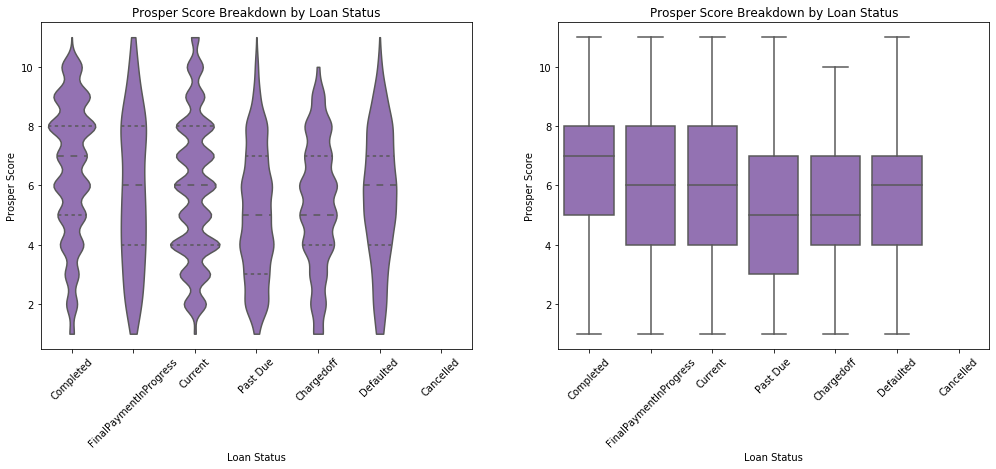

In [131]:
plt.figure(figsize = (17, 6))
plt.subplot(1, 2, 1)
violinplot(df_loan.LoanStatus, df_loan.ProsperScore)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Prosper Score')
plt.title('Prosper Score Breakdown by Loan Status');

plt.subplot(1, 2, 2)
box_plot(df_loan.LoanStatus, df_loan.ProsperScore)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Prosper Score')
plt.title('Prosper Score Breakdown by Loan Status');

* The violin plot shows that the distribution of Prosper scores is multimodal for completed and current loans. The median score is also higher than in any of the other statuses. 
* The boxplot reveals that the top end of the IQR for both defaulted and charged off loans is at or slightly below the median Prosper score for completed loans. The Prosper score seems to have a minimal impact on a borrower's ability to repay a loan. Due to the IQRs consisting of higher score values compared to the defaulted and charged off accounts, this minimal impact may be indicative of higher scores more likely to result in a positive outcome.


#### E. Boxplot for scheduled monthly payment versus loan status and original loan amount vs loan status

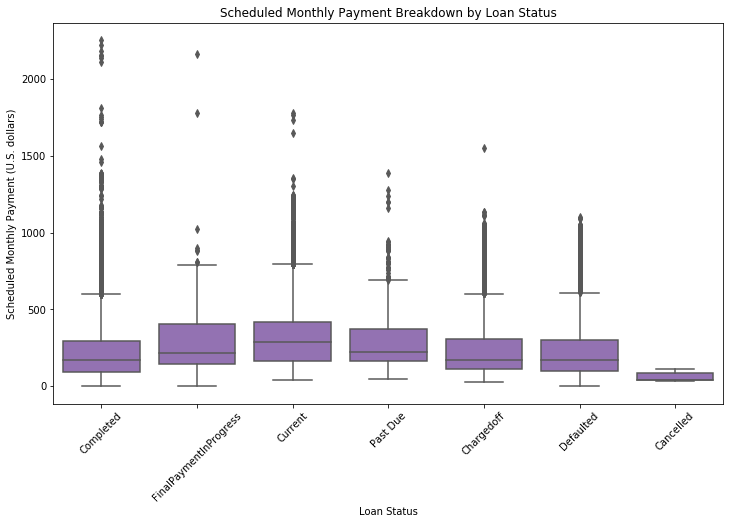

In [132]:
# Plotting for monthly payment amounts
plt.figure(figsize = (12, 7))
box_plot(df_loan.LoanStatus, df_loan.MonthlyLoanPayment)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Scheduled Monthly Payment (U.S. dollars)')
plt.title('Scheduled Monthly Payment Breakdown by Loan Status');
                                                             
 

In [95]:
# Creating a dataframe consisting of only rows with a monthly payment of <= $1,000
df_loan3 = df_loan[df_loan['MonthlyLoanPayment'] <= 1000]

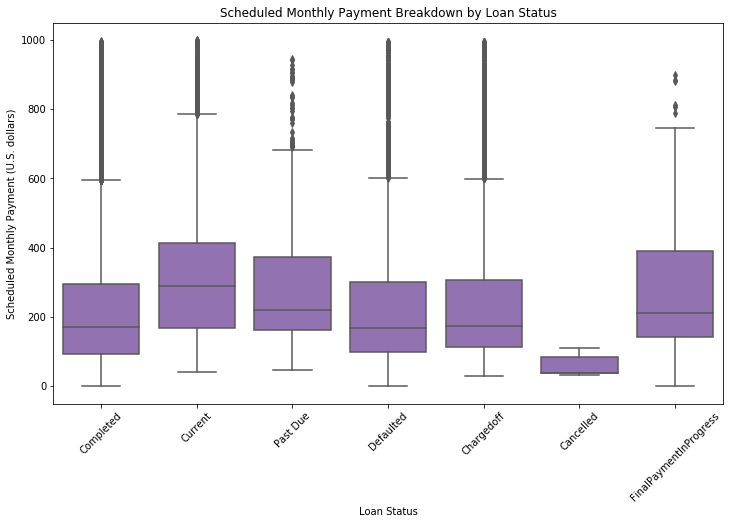

In [133]:
plt.figure(figsize = (12, 7))
box_plot(df_loan3.LoanStatus, df_loan3.MonthlyLoanPayment)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Scheduled Monthly Payment (U.S. dollars)')
plt.title('Scheduled Monthly Payment Breakdown by Loan Status');
                                                             

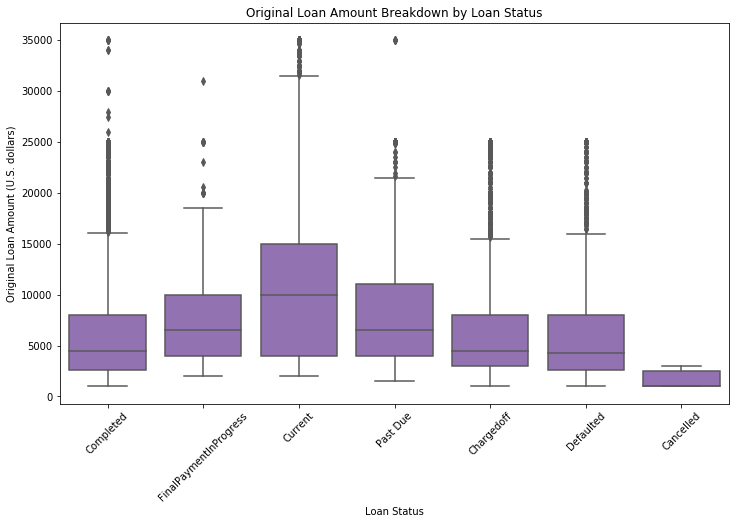

In [141]:
# Plotting original loan amount
plt.figure(figsize = (12, 7))
box_plot(df_loan.LoanStatus, df_loan.LoanOriginalAmount)
plt.xticks(rotation = 45)
plt.xlabel('Loan Status')
plt.ylabel('Original Loan Amount (U.S. dollars)')
plt.title('Original Loan Amount Breakdown by Loan Status');
                                                             

* There does not seem to be any indication that higher monthly payments result in the inability of a borrower to repay a debt. 
* Surprisingly, loans with a current status and those with final payment in progress have the highest 3rd quartile, with current loans having the highest median scheduled monthly payment. Past due loans have the third highest 3rd quartile.
* Having looked at monthly payments and original loan amounts individually compared to the loan status, how might the original loan coupled with monthly payments factor into the status of a loan?
 

#### F. Boxplot for income ranges versus Prosper Score

In [98]:
# Further cleaning the IncomeRange column to combine some of the categories and put into sequential order
df_loan.IncomeRange = df_loan.IncomeRange.astype(str)
df_loan.IncomeRange = df_loan.IncomeRange.replace(['Not displayed', 'Not employed', '$0 '], '$0/Other')

In [99]:
ordinal_var_dict2 = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', \
                                    '$0/Other']} 
                    
                     
for var in ordinal_var_dict2:
    ordered_var2 = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict2[var])
    df_loan[var] = df_loan[var].astype(ordered_var2)
                                                   

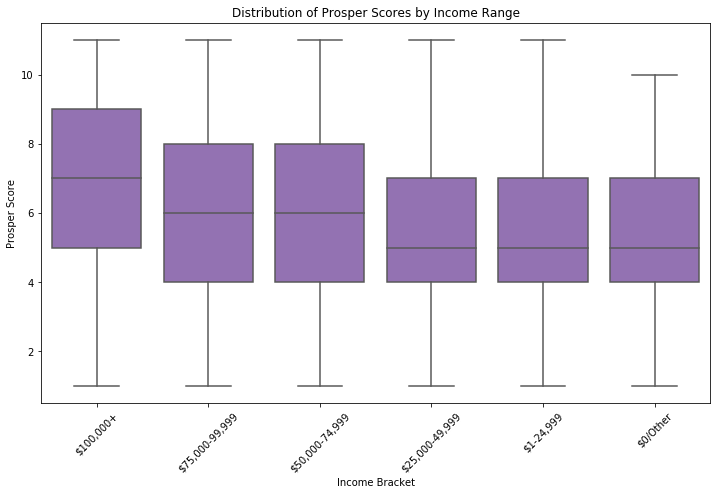

In [134]:
plt.figure(figsize = (12, 7))
box_plot(df_loan.IncomeRange, df_loan.ProsperScore)
plt.xticks(rotation = 45)
plt.xlabel('Income Bracket')
plt.ylabel('Prosper Score')
plt.title('Distribution of Prosper Scores by Income Range');

* Median Prosper scores are highest in the highest income bracket and trend towards a decrease in the lower income brackets. The 3rd quartiles are also highest in the top three income brackets.
* Since there was a moderate correlation between Prosper score and the interest rate of the loan, a higher income may be beneficial to having a higher Prosper score along with lower interest rates.
 

#### 3. Observing relationships between two categorical variables

#### A. Relationship between the term length and loan outcome

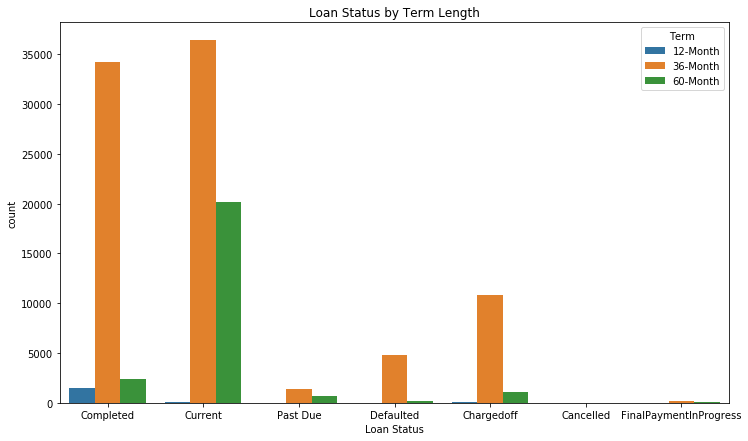

In [101]:
# Clustered bar chart between the two variables
plt.figure(figsize = (12, 7))
sn.countplot(data = df_loan, x = 'LoanStatus', hue = 'Term')
plt.xlabel('Loan Status')
plt.title('Loan Status by Term Length');

* Loans with a term of 36 months are most represented in all loan outcomes, followed by 60-month terms. Considering that 36-month terms, followed by 60-month term loans were the most represented in the dataset, this chart does not really provide us with any useful information on how the term length may affect the loan status. 

#### B. Relationship between income ranges and loan status

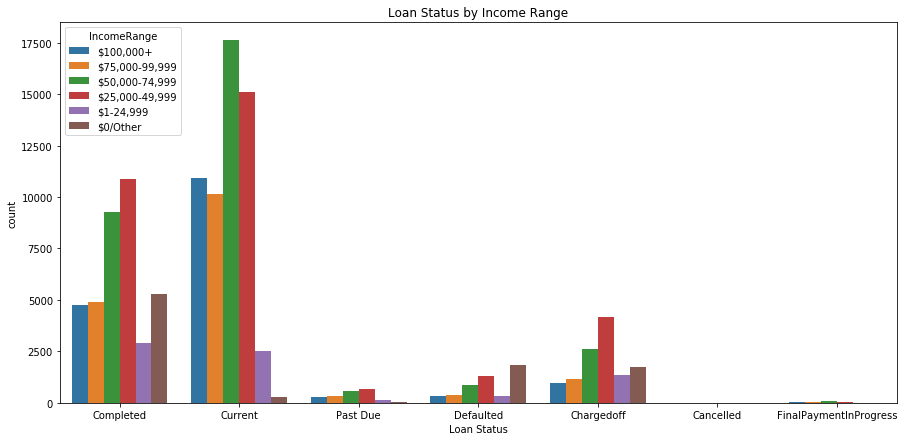

In [102]:
plt.figure(figsize = (15, 7))
sn.countplot(data = df_loan, x = 'LoanStatus', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.title('Loan Status by Income Range');

* For completed loans, the income ranges from 25k to 75k have most distant ratio to the under 25k income range and to the 'Other' category. The same is true for the loans with a current status. For defaulted and charged off loans, those in the 25k to 50k range make up the greatest count. 

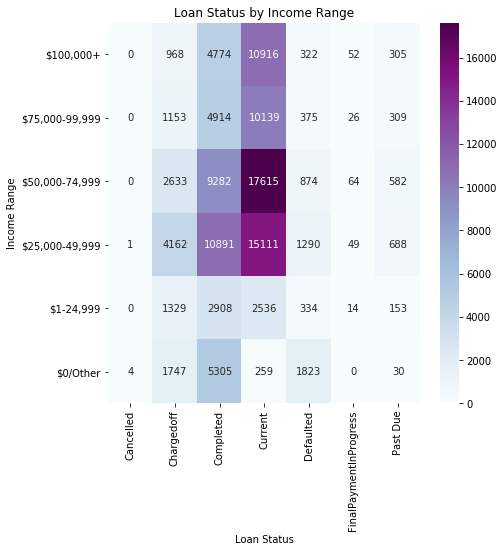

In [103]:
# Generating a heatmap with the same two variables investigated above
# Summarizing the counts into a matrix to be used for plotting
ct_counts = df_loan.groupby(['LoanStatus', 'IncomeRange']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'count')

# Plotting the heatmap
plt.figure(figsize = (7, 7))
mask = ct_counts.isnull()
sn.heatmap(ct_counts, annot = True, fmt = 'd', mask = mask, cmap = 'BuPu')
plt.xlabel('Loan Status')
plt.ylabel('Income Range')
plt.title('Loan Status by Income Range');



* The heatmap shows the greatest count for loans with a current status at the 50k to 75k range followed by the income range of 25k to 50k. For completed loans, the same top two income ranges have the greatest count but in reverse order as seen in the current status. 
* For defaulted and charged off accounts, the income range of 25k to 50k had greater numbers than what is seen for the under 25k range or the zero/other category. 
* Having very little income may not necessarily mean that a borrower is less likely to repay a debt. It can also be shown that higher incomes may help borrowers repay a debt.

#### C. Relationship between Prosper rating and loan status

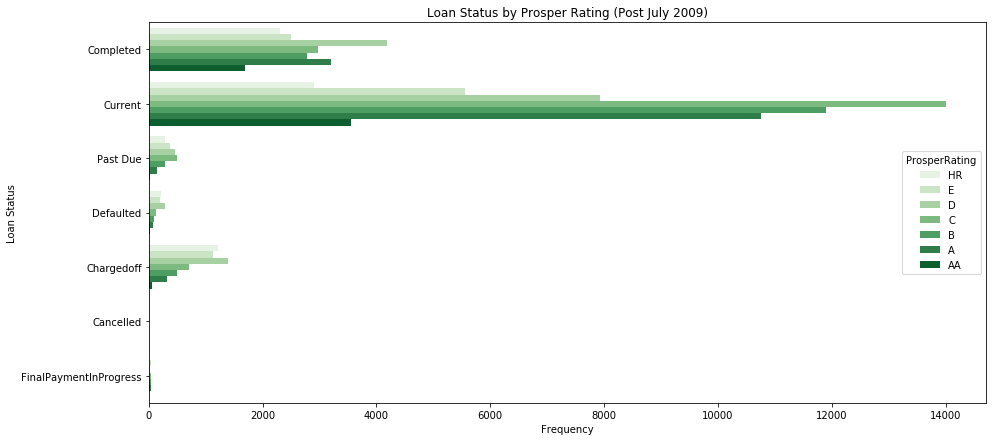

In [104]:
plt.figure(figsize = (15, 7))
sn.countplot(data = df_loan, y = 'LoanStatus', hue = 'ProsperRating', palette = 'Greens')
plt.xlabel('Frequency')
plt.ylabel('Loan Status')
plt.title('Loan Status by Prosper Rating (Post July 2009)');

* As highlighted by the darker shades, higher Prosper ratings may have some correlation with a borrower being able to maintain the account. 
* A rating of 'D' made up the largest portion for completed loans.
* For charged off and defaulted loans, lower Prosper ratings had a greater count when compared to higher Prosper ratings. 
* Having a top Prosper rating does not necessarily mean always being able to repay a debt as noted by the darkened bars in the charged off or defaulted statuses. A borrower's change in employment status may also impact the ability to repay a debt.

#### D. Relationship between employment status and loan status

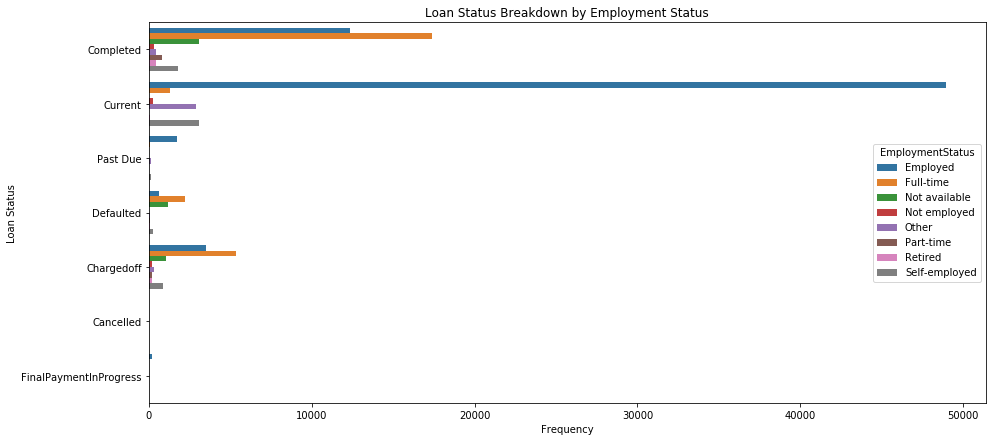

In [105]:
plt.figure(figsize = (15, 7))
sn.countplot(data = df_loan, y = 'LoanStatus', hue = 'EmploymentStatus')
plt.xlabel('Frequency')
plt.ylabel('Loan Status')
plt.title('Loan Status Breakdown by Employment Status');

* One would expect charged off and defaulted accounts to have a greater frequency of borrowers who are not employed-full time. It is surprising to see that full-time employees make up a greater count of borrowers who defaulted or had their loans charged off when compared to part-time employees or those not even working.

 ### Observed relationships between the loan status and other variables
* Upper credit score ranges are on average lower for loans that result in being charged off or defaulted. The median values upper credit scores are also lower in accounts that are passed due when compared to current accounts.
* Loans with a negative outcome were also more associated with borrowers who had a greater amount of current delinquencies. Completed and current loans had less outliers, often consisting of several delinquencies when compared to loans with a negative outcome.
* Debt-to-income ratio did not appear to have any impact on the status of a loan. 
* On average, positive loan statuses were associated with higher Prosper scores when compared to loans with a negative status.
* From my observations, the amount of the monthly loan payment did not appear to have a negative bearing on the ability of a borrower to repay a debt.
* When looking at the income ranges and loan status, income ranges of 25k to 75k made up for the greatest count for loans that were current.
* Prosper credit ratings of 'D' or better on average had better outcomes on the loan status
* Surprisingly when looking at employment status, it was not borrowers who were part-time or not employed that made for the greatest count in defaulted or charged off accounts, it was actually those who were employed full-time.

### Observed relationships involving interest rate
* There was moderate negative correlation when comparing Prosper Score and interest rate. Those with lower interests’ rates tend to have had a higher Prosper score. Higher income also appeared to be related to having a higher Prosper score. It is the assumption that higher income means having the ability to pay off debt and thus have a better credit rating. 
* Although we got some more insights on doing bivariate exploration, some more insights might be yielded when doing some multivariate exploration.
 


## Multivariate Exploration 

### 1. Exploration using three quantitative variables
#### Exploring the relationship between Prosper Score, Interests' rates, and debt-to-income ratio

In [106]:
# Creating a new dataframe to focus on the bulk of the debt-to-income ratio values and exclude a few of the extreme outliers
df_loan4 = df_loan[df_loan['DebtToIncomeRatio'] <= 1]

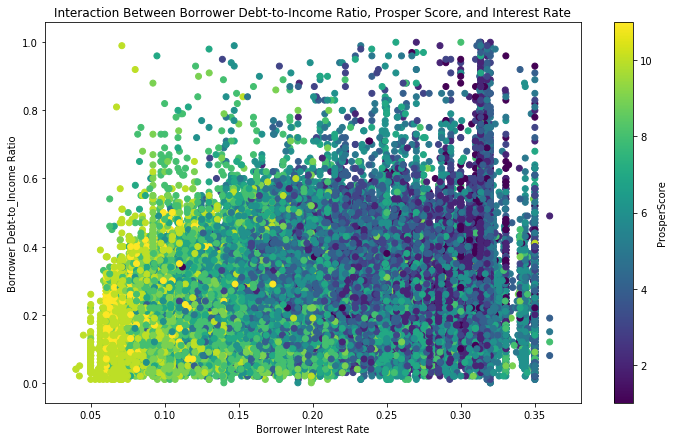

In [107]:
plt.figure(figsize = (12, 7))
plt.scatter(data = df_loan4, x = 'BorrowerRate', y = 'DebtToIncomeRatio', c = 'ProsperScore' )
plt.colorbar(label = 'ProsperScore')
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Borrower Debt-to_Income Ratio')
plt.title('Interaction Between Borrower Debt-to-Income Ratio, Prosper Score, and Interest Rate');
 
 
 

* The scatterplot reveals that higher Prosper scores along with lower debt-to-income ratios are more prevalent in loans with lower interests’ rates. As interests' rates increase you also see an increase in the debt-to-income ratio. As noted by the darkened regions, lower Prosper scores along with higher debt-to-income rations appear to be correlated with higher interests' rates.
* It looks like having both a good Prosper score along with a lower debt-to-income ratio will yield better chances of paying a smaller interest rate.
 

### 2. Exploration of two quantitative variables and one qualitative variable
#### A. How might both the original loan amount and scheduled monthly payment affect the status of a loan?

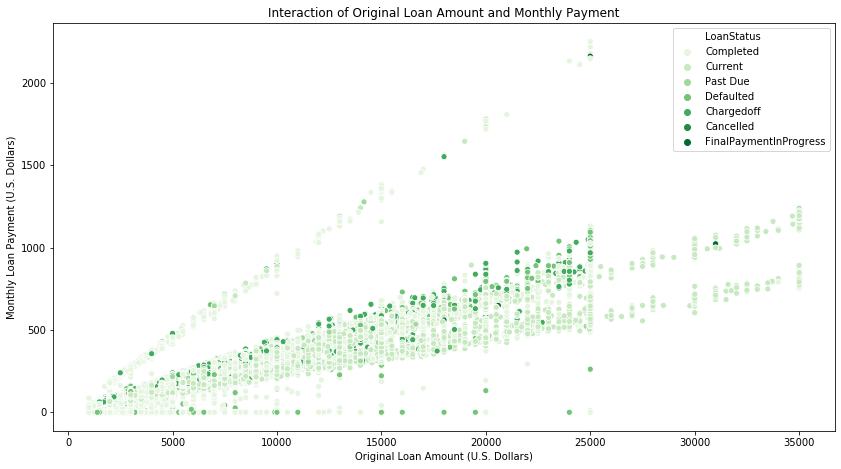

In [108]:
plt.figure(figsize = ( 14, 7.5))
sn.scatterplot(data = df_loan, x = 'LoanOriginalAmount', y=  'MonthlyLoanPayment', hue = 'LoanStatus', palette = 'Greens') 
plt.xlabel('Original Loan Amount (U.S. Dollars)')
plt.ylabel('Monthly Loan Payment (U.S. Dollars)')
plt.title('Interaction of Original Loan Amount and Monthly Payment');

* When observing the interaction between monthly payment and original loan amount versus the loan status as bivariate analysis, there did not seem to be much of an effect on these two variables individually. 
* When looking at these two variables as a multivariate analysis, we can see there is a slightly greater frequency of darkened circles on original loan amounts up to 25k and with monthly payments approaching and exceeding the 500-dollar mark. 
* Although there are a few clusters of charged off and defaulted accounts on lower original loan amounts and monthly payments, we see these clusters increase somewhat as both the original loan amount and monthly payment go up. After around 25k these clusters appear to stop. 
* A high monthly payment in combination with a high original loan amount may pose a slightly greater liability when it comes to the positive outcome the financial obligation.


#### B. How might a borrower's income range affect both the interest rate of a loan and his/her Prosper score?

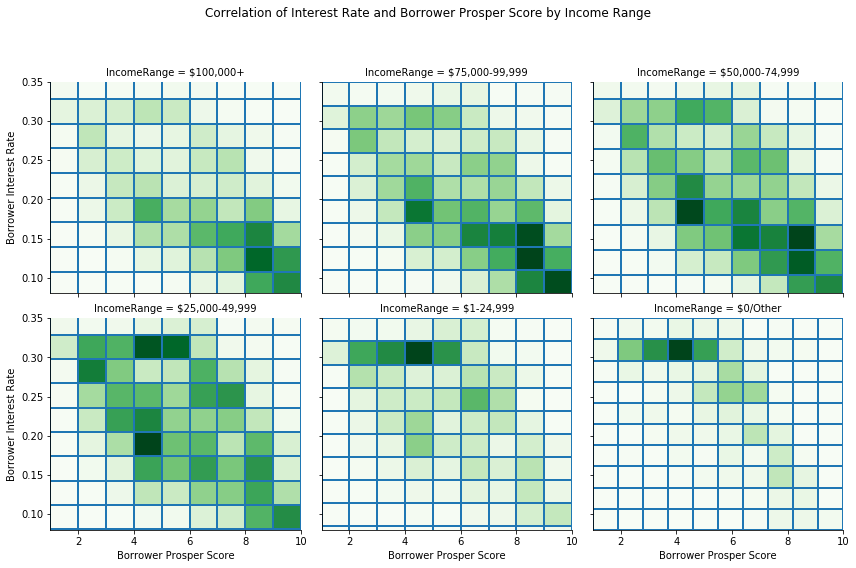

In [109]:
g = sn.FacetGrid(data = df_loan, col = 'IncomeRange', col_wrap = 3, height = 4)
g.map(plt.hist2d, 'ProsperScore', 'BorrowerRate', cmap = 'Greens')
g.set_axis_labels(x_var = 'Borrower Prosper Score', y_var = 'Borrower Interest Rate');
g.fig.suptitle('Correlation of Interest Rate and Borrower Prosper Score by Income Range')
g.fig.subplots_adjust(top = 0.85);
 


* Higher income ranges appear to show a stronger correlation between the Prosper score and interest rate. The darkened areas show the higher concentrations of borrowers who a higher Prosper score and reduced interest rate. 
* As income drops, there appears to be a shift in both a lower Prosper score and higher interest rates. 
* Borrowers with higher incomes are likely to have both a higher Prosper score and lower interest rates. 

#### C. How might a Borrower's Prosper score and the amount of interest paid affect the final outcome of a loan?

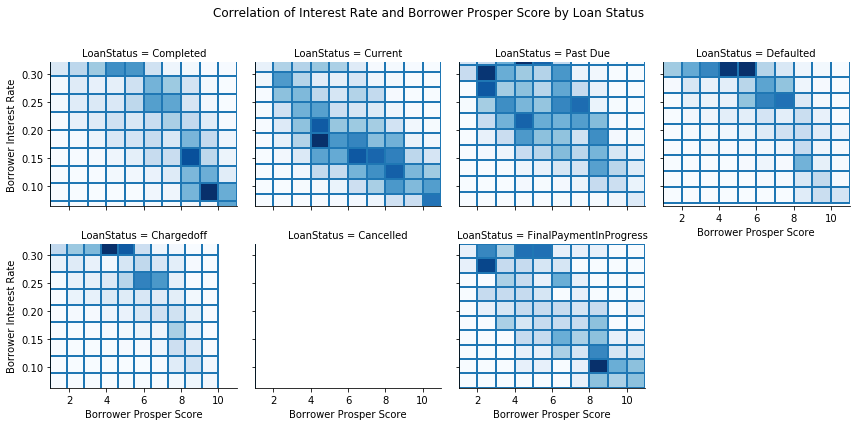

In [110]:
g1 = sn.FacetGrid(data = df_loan, col = 'LoanStatus', col_wrap = 4, height = 3)
g1.map(plt.hist2d, 'ProsperScore', 'BorrowerRate', cmap = 'Blues')
g1.set_axis_labels(x_var = 'Borrower Prosper Score', y_var = 'Borrower Interest Rate');
g1.fig.suptitle('Correlation of Interest Rate and Borrower Prosper Score by Loan Status')
g1.fig.subplots_adjust(top = 0.85);
 
  

* Looking at the past due, charged off, and defaulted accounts, there are higher concentrations of borrowers with both low to medium Prosper score coupled with higher a higher interest rate. These clusters of borrowers appear to be at or above the 30% interest rate mark.
* Higher interests rates result in paying more towards the original loan. Perhaps, higher borrowers paying higher interests rates may be more prone to having the inability to repay a debt.

### Exploration of two qualitative variables and one quantitative variable
#### A. How might both interest rate and borrower income affect the outcome repaying a debt?

In [111]:
# Ordering the loan status from positive outcomes to negative outcomes and ending with cancelled
ordinal_var_dict3 = {'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due', 'Chargedoff', 'Defaulted',  \
                                    'Cancelled']} 
                    
for var in ordinal_var_dict3:
    ordered_var3 = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict3[var])
    df_loan[var] = df_loan[var].astype(ordered_var3)
                                                              

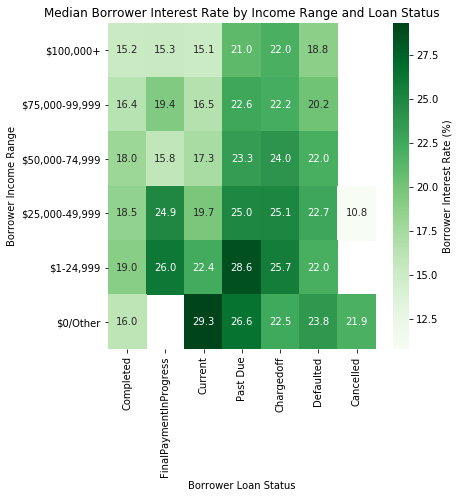

In [112]:
# Summarizing the data prior to plotting the heatmap
cat_counts = df_loan.groupby(['LoanStatus', 'IncomeRange']).median()['BorrowerRate'] * 100
cat_counts = cat_counts.reset_index(name = 'MedianBorrowerRate')
cat_counts = cat_counts.pivot(index = 'IncomeRange',columns = 'LoanStatus', values = 'MedianBorrowerRate')

plt.figure(figsize = (6, 6))
sn.heatmap(cat_counts, annot = True, cmap = 'Greens', fmt = '.1f', cbar_kws = {'label': 'Borrower Interest Rate (%)'})
plt.ylabel('Borrower Income Range')
plt.xlabel('Borrower Loan Status')
plt.title('Median Borrower Interest Rate by Income Range and Loan Status');

* The heatmap shows that as income decreases, there is an increase in the median interest rate across all loan statuses. 
* Completed loans appear to have the lowest median interest rate across all income ranges.
* Current loans have increasing interests' rates as income decreases. 
* Past due and charged off accounts all have borrowers with interests' rates above 20% with a trend towards higher interests' rates as income decreases. The same general trend can be seen for defaulted loans, but interests' rates are not as high as the past due or charged off accounts.
* As we saw how there is a negative moderate correlation between Prosper Score and median interest rate, let us see how Prosper score may affect the loan status across income ranges.
 

#### B. How might a Borrower's Prosper score and income range affect the ability to repay a debt?

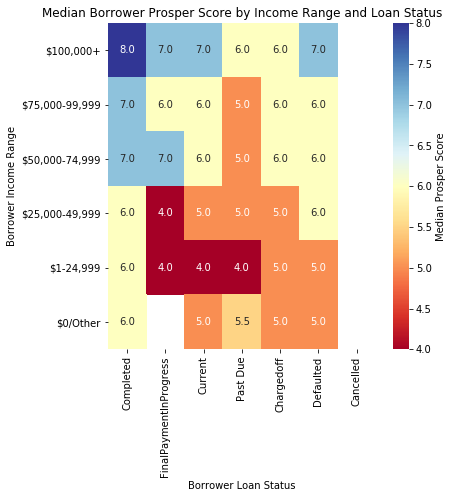

In [113]:
cat_counts2 = df_loan.groupby(['LoanStatus', 'IncomeRange']).median()['ProsperScore'] * 1
cat_counts2 = cat_counts2.reset_index(name = 'MedianProsperScore')
cat_counts2 = cat_counts2.pivot(index = 'IncomeRange',columns = 'LoanStatus', values = 'MedianProsperScore')

plt.figure(figsize = (6, 6))
sn.heatmap(cat_counts2, annot = True, cmap = 'RdYlBu', fmt = '.1f', cbar_kws = {'label': 'Median Prosper Score'})
plt.ylabel('Borrower Income Range')
plt.xlabel('Borrower Loan Status')
plt.title('Median Borrower Prosper Score by Income Range and Loan Status'); 

* Median Prosper scores are trending towards higher values in the higher income ranges along with accounts with a positive status.
* There is does appear to be a downward trend in median Prosper scores in the lower income brackets. 
* Borrowers in the under 25k range had the lowers median Prosper scores across all loan outcomes. 
* The lowest median Prosper scores do appear to trend towards the lower income spectrum along with loans with a more negative outcome.
 

* Beginning with univariate exploration we gained some useful statistics on each of the variables that could affect both the borrower's interest rate and ability to repay the loan. In the bivariate exploration portion, variables of interest were compared with one another to yield some further insight. Often reaching a dead end with bivariate exploration, multivariate exploration allowed for further investigation to see if a third variable may yield some clearer insights.
* From the multivariate exploration, it turns out that a combination of factors including the original loan amount, monthly loan payment, Prosper score, interest rate, and income level may have some an affect in a borrower's ability to repay debt. The larger the original loan amount coupled with a larger monthly payment may pose a somewhat of a liability in terms of the repayment of a debt. Since there was a moderate correlation between interest rate and Prosper score, higher income borrowers with higher Prosper scores appeared to have the least risk compared to lower income borrowers. 
* When it comes to repaying off debt, borrowers with steady employment, sufficient income, and adequate credit scores tend to present the least risk. However, there are exceptions to the rule as demonstrated by outliers.   
 


###  Resources
* https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/
* https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer
* https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn
* https://www.prosper.com/blog/2020/01/16/what-is-a-good-credit-score/
* https://datascience.stackexchange.com/questions/45383/how-to-fill-in-missing-value-of-the-mean-of-the-other-columns
* https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php
* https://stackoverflow.com/questions/28115637/how-to-better-fit-seaborn-violinplots/28119908#28119908
* https://stackoverflow.com/questions/28638158/seaborn-facetgrid-how-to-leave-proper-space-on-top-for-suptitle
* https://www.protechtraining.com/content/python_fundamentals_tutorial- 
* https://www.protechtraining.com/content/python_fundamentals_tutorial-functions#:~:text=7.1.&text=A%20function%20without%20an%20explicit,%3E%3E%3E